# Vehicle Insurance Claim Fraud Detection

### CS-SBU-2023

In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import classification_report, f1_score, roc_curve,auc, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
import math
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")

In [365]:
data_raw = pd.read_csv("./data/fraud_oracle.csv")

In [366]:
data = data_raw.copy()

In [367]:
data_raw.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [368]:
data_raw.shape

(15420, 33)

15420 data with 33 features.

In [369]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [370]:
data_raw.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


This is shown for the numerical features, which are only 9 items.

We have to change the categorical ones to numerical ones, so we can analyse them.

Our target:

In [491]:
data["FraudFound_P"]

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15419, dtype: int64

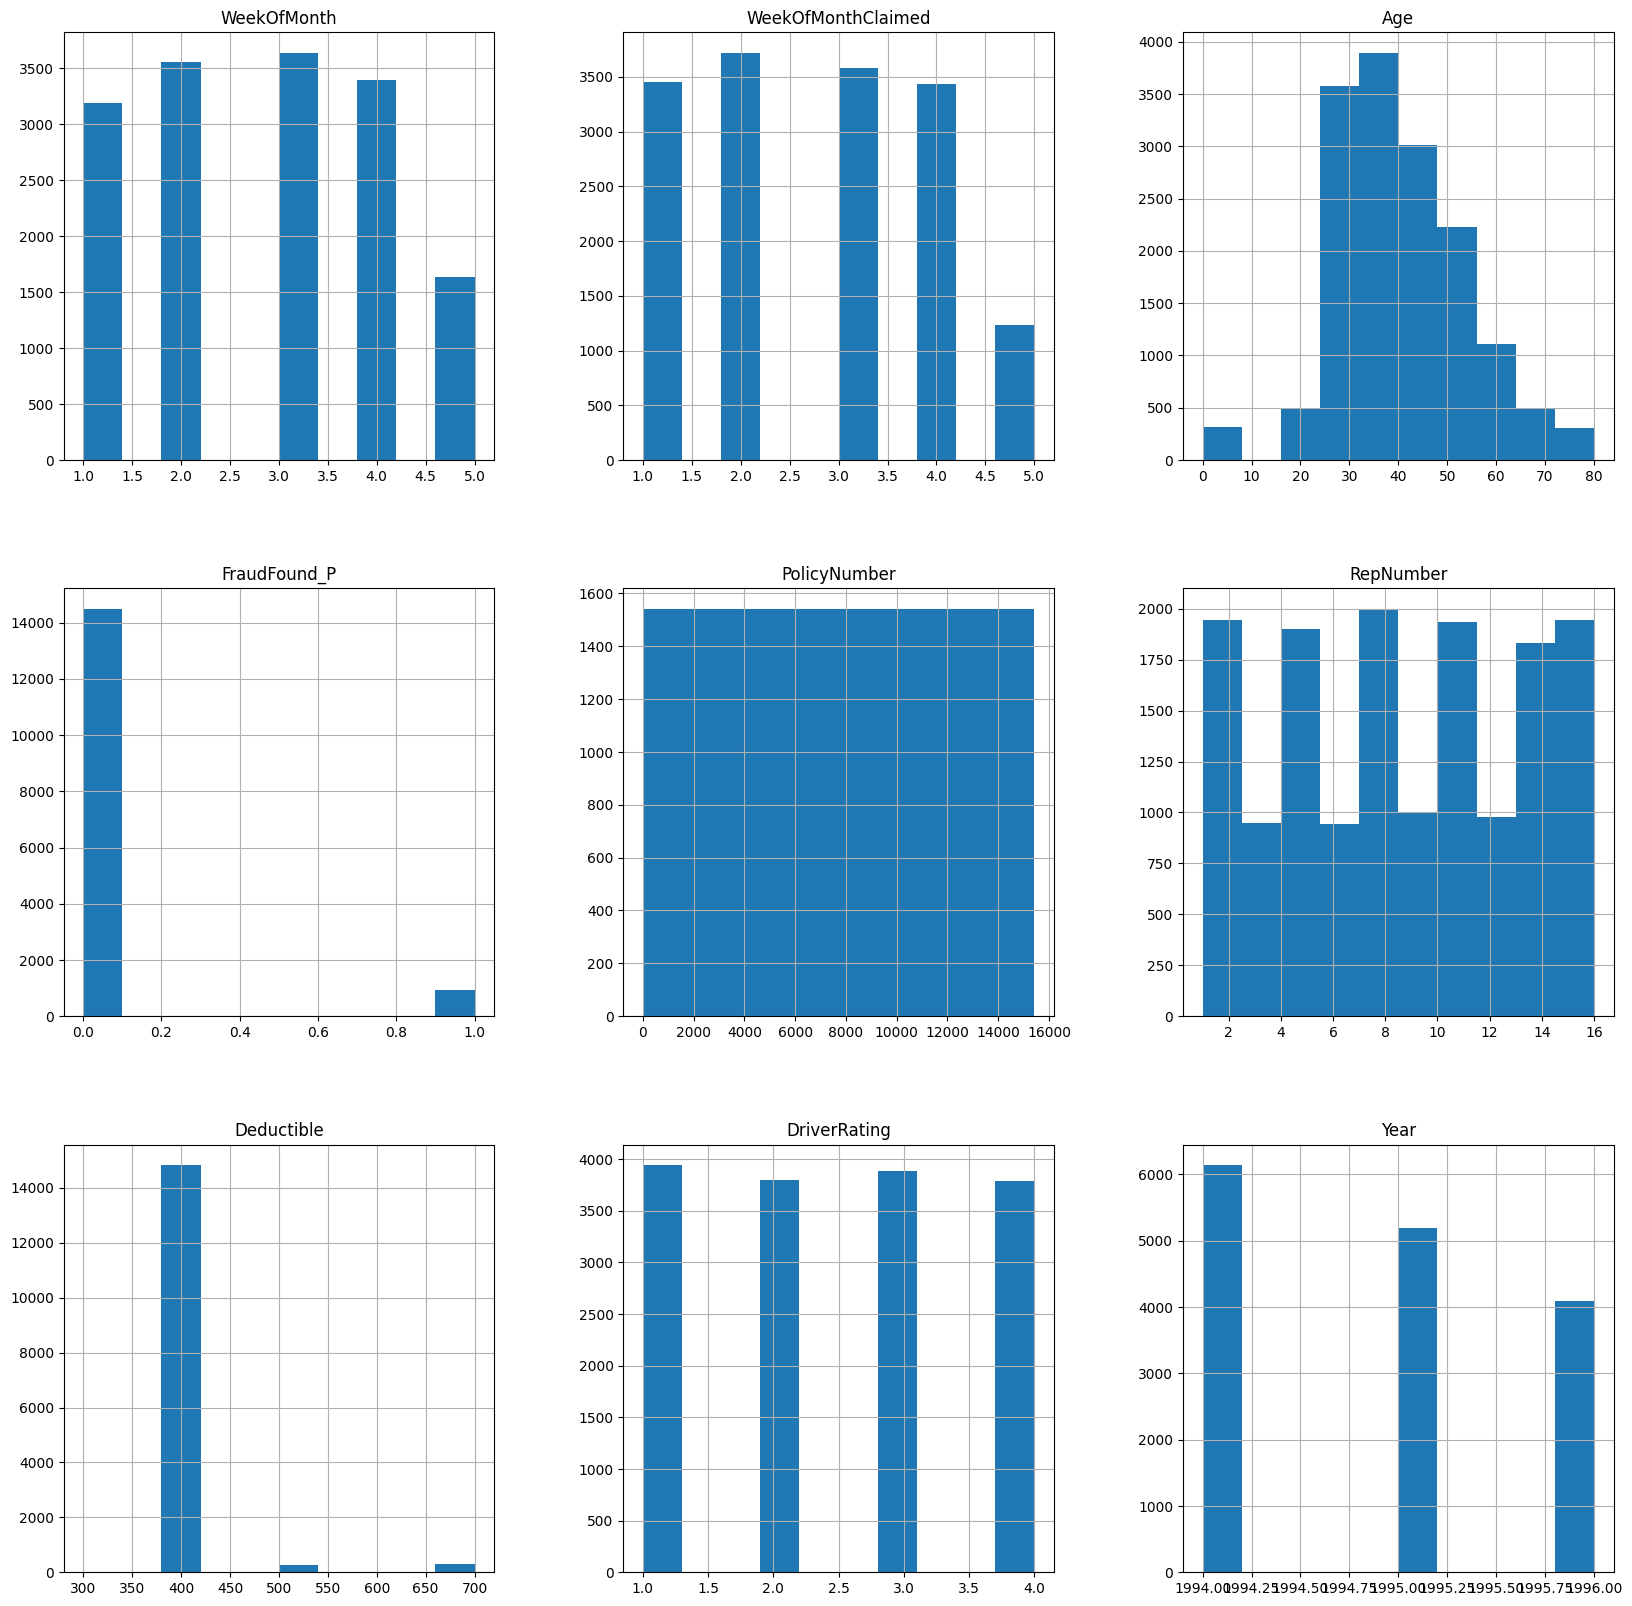

In [372]:
data_raw.hist(figsize=(20,20))
plt.show()

### Encoding Data

In [373]:
data_raw.select_dtypes(include="object")

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [374]:
target = 'FraudFound_P'

In [375]:
categorical_attributes = data_raw.select_dtypes(include="object").columns
categorical_attributes

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [376]:
numerical_attributes = data_raw.select_dtypes(include="int64").columns
numerical_attributes

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

Now we have to replace our categorical values with numerical ones.

First I'm going to change the values for the attributes that are ordinal.

In [377]:
np.unique(data_raw["Month"])

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [378]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [379]:
data['Month'].replace(months,list(range(0,len(months))), inplace=True)

In [380]:
np.unique(data_raw["MonthClaimed"])

array(['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [381]:
data = data[data["MonthClaimed"] != '0']

In [382]:
np.unique(data["MonthClaimed"])

array(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [383]:
data['MonthClaimed'].replace(months,list(range(0,len(months))), inplace=True)

In [384]:
np.unique(data_raw["AgeOfVehicle"])

array(['2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
       'more than 7', 'new'], dtype=object)

In [385]:
ageOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']

In [386]:
data['AgeOfVehicle'].replace(ageOfVehicle,list(range(0,len(ageOfVehicle))), inplace=True)

In [387]:
ageOfPolicyHolder = np.unique(data_raw["AgeOfPolicyHolder"])

In [388]:
ageOfPolicyHolder

array(['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35',
       '36 to 40', '41 to 50', '51 to 65', 'over 65'], dtype=object)

In [389]:
data['AgeOfPolicyHolder'].replace(ageOfPolicyHolder,list(range(0,len(ageOfPolicyHolder))), inplace=True)

In [390]:
agentType = np.unique(data_raw["AgentType"])

In [391]:
agentType

array(['External', 'Internal'], dtype=object)

In [392]:
data['AgentType'].replace(agentType,list(range(0,len(agentType))), inplace=True)

In [393]:
np.unique(data_raw["NumberOfSuppliments"])

array(['1 to 2', '3 to 5', 'more than 5', 'none'], dtype=object)

In [394]:
numberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']

In [395]:
data['NumberOfSuppliments'].replace(numberOfSuppliments,list(range(0,len(numberOfSuppliments))), inplace=True)

In [396]:
np.unique(data_raw["AddressChange_Claim"])

array(['1 year', '2 to 3 years', '4 to 8 years', 'no change',
       'under 6 months'], dtype=object)

In [397]:
addressChange_Claim = ['no change','under 6 months','1 year', '2 to 3 years', '4 to 8 years']

In [398]:
data['AddressChange_Claim'].replace(addressChange_Claim,list(range(0,len(addressChange_Claim))), inplace=True)

In [399]:
numberOfCars = np.unique(data_raw["NumberOfCars"])

In [400]:
numberOfCars

array(['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8'],
      dtype=object)

In [401]:
data['NumberOfCars'].replace(numberOfCars,list(range(0,len(numberOfCars))), inplace=True)

In [402]:
np.unique(data_raw["VehiclePrice"])

array(['20000 to 29000', '30000 to 39000', '40000 to 59000',
       '60000 to 69000', 'less than 20000', 'more than 69000'],
      dtype=object)

In [403]:
vehiclePrice = ['less than 20000','20000 to 29000', '30000 to 39000', '40000 to 59000','60000 to 69000', 'more than 69000']

In [404]:
data['VehiclePrice'].replace(vehiclePrice,list(range(0,len(vehiclePrice))), inplace=True)

In [405]:
np.unique(data_raw["Days_Policy_Accident"])

array(['1 to 7', '15 to 30', '8 to 15', 'more than 30', 'none'],
      dtype=object)

In [406]:
days_Policy_Accident =['none','1 to 7', '8 to 15', '15 to 30', 'more than 30']

In [407]:
data['Days_Policy_Accident'].replace(days_Policy_Accident,list(range(0,len(days_Policy_Accident))), inplace=True)

In [408]:
np.unique(data_raw["Days_Policy_Claim"])

array(['15 to 30', '8 to 15', 'more than 30', 'none'], dtype=object)

In [409]:
days_Policy_Claim =['none', '8 to 15','15 to 30', 'more than 30']

In [410]:
data['Days_Policy_Claim'].replace(days_Policy_Claim,list(range(0,len(days_Policy_Claim))), inplace=True)

In [411]:
np.unique(data_raw["PastNumberOfClaims"])

array(['1', '2 to 4', 'more than 4', 'none'], dtype=object)

In [412]:
pastNumberOfClaims =['none', '1', '2 to 4', 'more than 4']

In [413]:
data['PastNumberOfClaims'].replace(pastNumberOfClaims,list(range(0,len(pastNumberOfClaims))), inplace=True)

In [414]:
np.unique(data_raw["DayOfWeekClaimed"])

array(['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'], dtype=object)

In [415]:
data = data[data["DayOfWeekClaimed"] != '0']
days_of_week = ['Monday','Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
data['DayOfWeekClaimed'].replace(days_of_week,list(range(0,len(days_of_week))), inplace=True)

In [416]:
np.unique(data_raw["DayOfWeek"])

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [417]:
data['DayOfWeek'].replace(days_of_week,list(range(0,len(days_of_week))), inplace=True)

In [418]:
data[['Month','MonthClaimed','AgeOfVehicle','AgeOfPolicyHolder','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','DayOfWeekClaimed','DayOfWeek']]

,Month,MonthClaimed,AgeOfVehicle,AgeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,DayOfWeekClaimed,DayOfWeek
0,11,0,2,3,0,0,2,2,5,4,3,0,1,2
1,0,0,5,4,0,0,0,0,5,4,3,0,0,2
2,9,10,6,6,0,0,0,0,5,4,3,1,3,4
3,5,6,7,7,0,3,0,0,1,4,3,1,4,5
4,0,1,4,4,0,0,0,0,5,4,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,10,5,4,0,0,0,0,1,4,3,2,1,4
15416,10,11,5,4,0,3,0,2,2,4,3,3,4,3
15417,10,11,4,3,0,1,0,0,1,4,3,3,4,3
15418,11,11,1,4,0,3,0,0,1,4,3,0,3,0


In [419]:
data.select_dtypes(include="object")

,Make,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,PoliceReportFiled,WitnessPresent,BasePolicy
0,Honda,Urban,Female,Single,Policy Holder,Sport - Liability,Sport,No,No,Liability
1,Honda,Urban,Male,Single,Policy Holder,Sport - Collision,Sport,Yes,No,Collision
2,Honda,Urban,Male,Married,Policy Holder,Sport - Collision,Sport,No,No,Collision
3,Toyota,Rural,Male,Married,Third Party,Sedan - Liability,Sport,Yes,No,Liability
4,Honda,Urban,Female,Single,Third Party,Sport - Collision,Sport,No,No,Collision
...,...,...,...,...,...,...,...,...,...,...
15415,Toyota,Urban,Male,Married,Policy Holder,Sedan - Collision,Sedan,No,No,Collision
15416,Pontiac,Urban,Male,Married,Policy Holder,Sedan - Liability,Sport,No,No,Liability
15417,Toyota,Rural,Male,Single,Policy Holder,Sedan - Collision,Sedan,No,No,Collision
15418,Toyota,Urban,Female,Married,Third Party,Sedan - All Perils,Sedan,No,No,All Perils


In [420]:
data = pd.get_dummies(data)
data

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,...,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,11,5,2,1,0,1,21,5,0,1,...,0,1,0,1,0,1,0,0,0,1
1,0,3,2,0,0,4,34,5,0,2,...,0,1,0,0,1,1,0,0,1,0
2,9,5,4,3,10,2,47,5,0,3,...,0,1,0,1,0,1,0,0,1,0
3,5,2,5,4,6,1,65,1,0,4,...,0,1,0,0,1,1,0,0,0,1
4,0,5,0,1,1,2,27,5,0,5,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,4,4,1,10,5,35,1,1,15416,...,1,0,0,1,0,1,0,0,1,0
15416,10,5,3,4,11,1,30,2,0,15417,...,0,1,0,1,0,1,0,0,0,1
15417,10,5,3,4,11,1,24,1,1,15418,...,1,0,0,1,0,1,0,0,1,0
15418,11,1,0,3,11,2,34,1,0,15419,...,1,0,0,1,0,1,0,1,0,0


In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Month                            15419 non-null  int64
 1   WeekOfMonth                      15419 non-null  int64
 2   DayOfWeek                        15419 non-null  int64
 3   DayOfWeekClaimed                 15419 non-null  int64
 4   MonthClaimed                     15419 non-null  int64
 5   WeekOfMonthClaimed               15419 non-null  int64
 6   Age                              15419 non-null  int64
 7   VehiclePrice                     15419 non-null  int64
 8   FraudFound_P                     15419 non-null  int64
 9   PolicyNumber                     15419 non-null  int64
 10  RepNumber                        15419 non-null  int64
 11  Deductible                       15419 non-null  int64
 12  DriverRating                     15419 non-nul

In [422]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Age', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'Make_Accura',
       'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'AccidentArea_Rural', 'AccidentArea_Urban', 'Sex_Female', 'Sex_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow', 'Fault_Policy Holder',
       'Fault_Third Party', 'PolicyType_Sedan - All Perils',


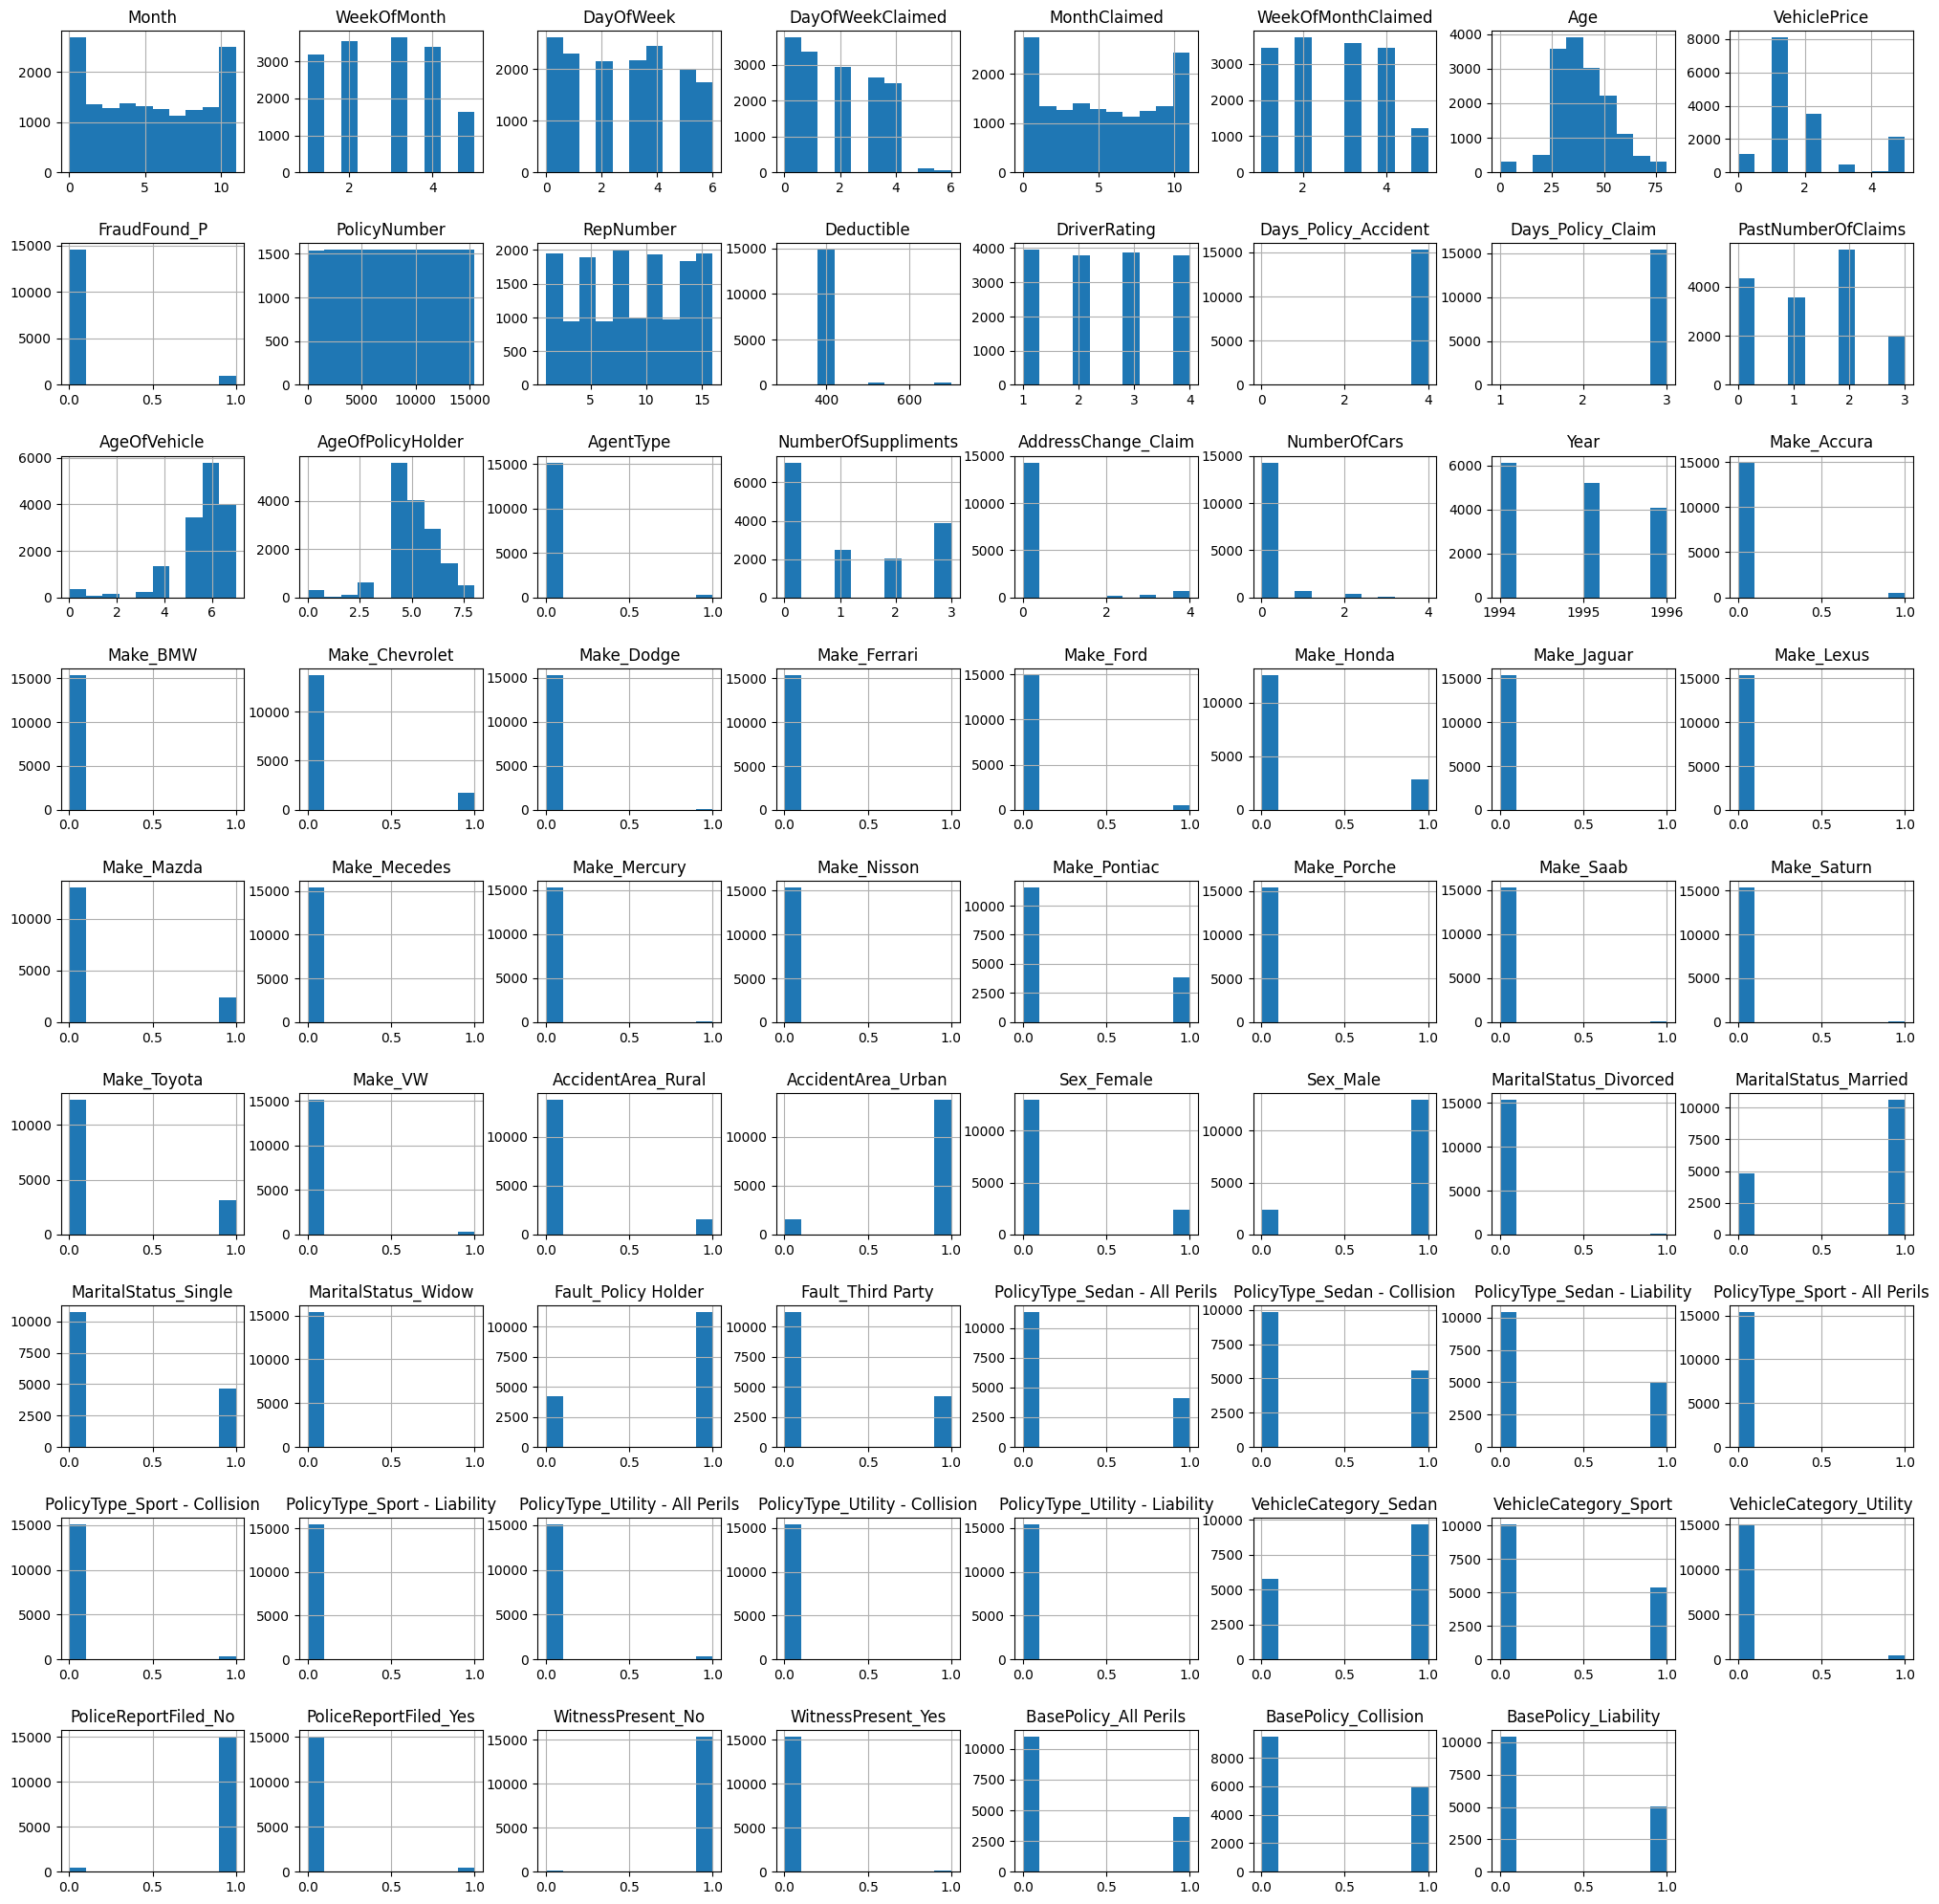

In [424]:
data.hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
plt.show()

In [425]:
total_c = data.shape[0]
fraud_c = data[data["FraudFound_P"] == 1].shape[0]
not_fraud_c = data[data["FraudFound_P"] == 0].shape[0]
print("%.2f" % ((fraud_c/total_c)*100), "% of our data is fraud and ", "%.2f" % ((not_fraud_c/total_c)*100), "% is not fraud.")

5.99 % of our data is fraud and  94.01 % is not fraud.


##### Day Of Week 

We can commpare the frauds done in different days.

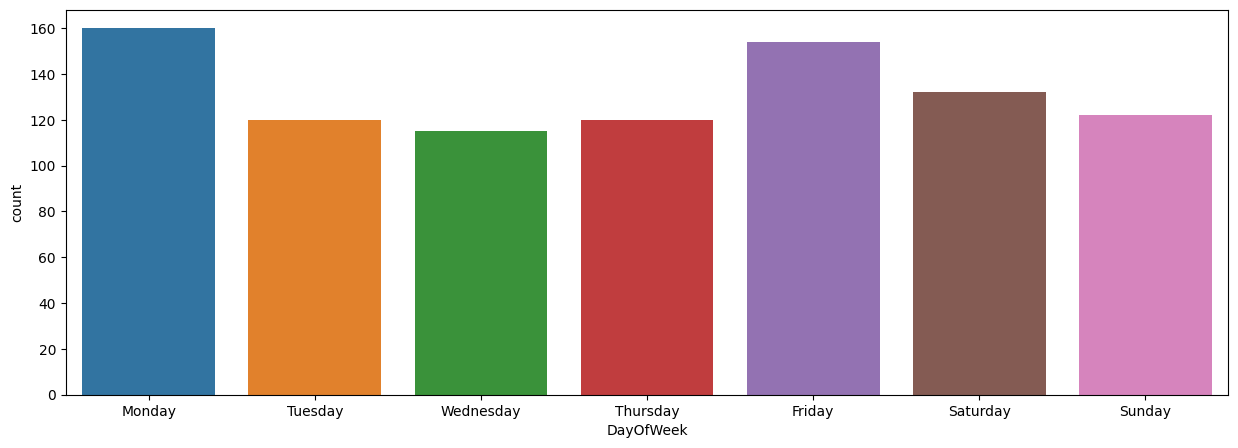

In [426]:
plt.figure(figsize=(15,5))
sns.countplot(data = data_raw[data_raw["FraudFound_P"] == 1], x = "DayOfWeek" , order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

We see that most Frauds are done on Mondays, and then Fridays.

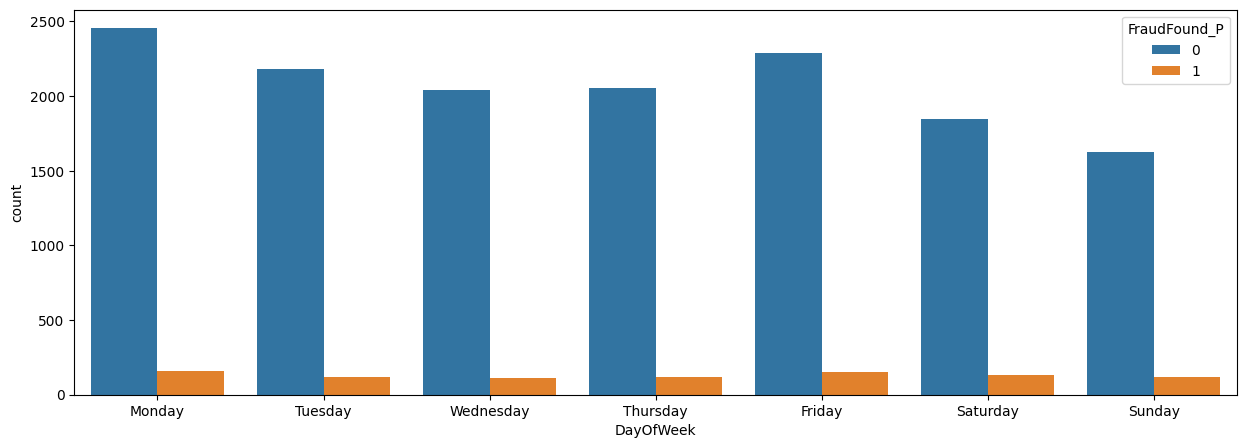

In [427]:
plt.figure(figsize=(15,5))
sns.countplot(x="DayOfWeek" , hue = 'FraudFound_P', data= data_raw, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

Maybe a new attribute that would show the count of frauds to the total count of actions in each day, could help. <br> We're going to try that out later.

##### Day Of Week Claimed

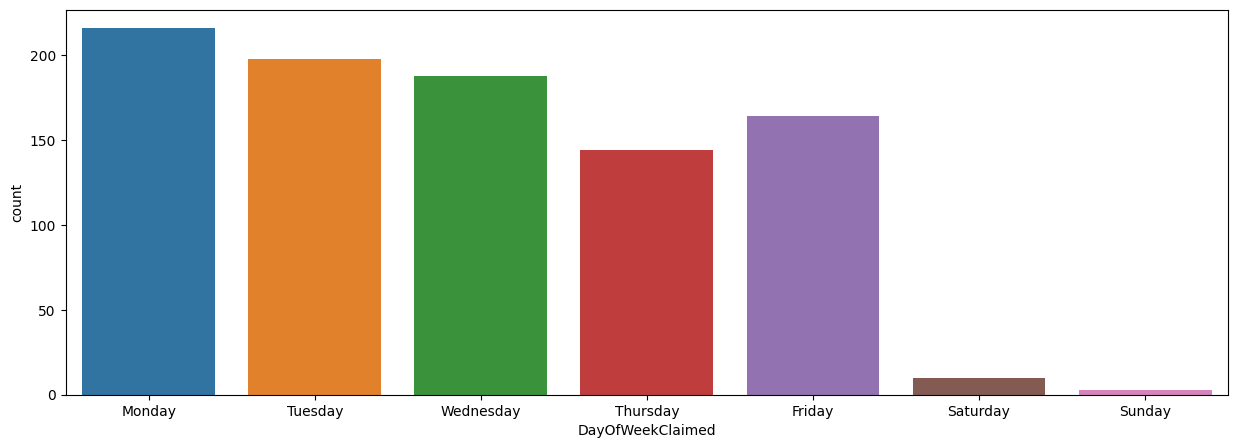

In [428]:
plt.figure(figsize=(15,5))
sns.countplot(data = data_raw[data_raw["FraudFound_P"] == 1], x = "DayOfWeekClaimed" , order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

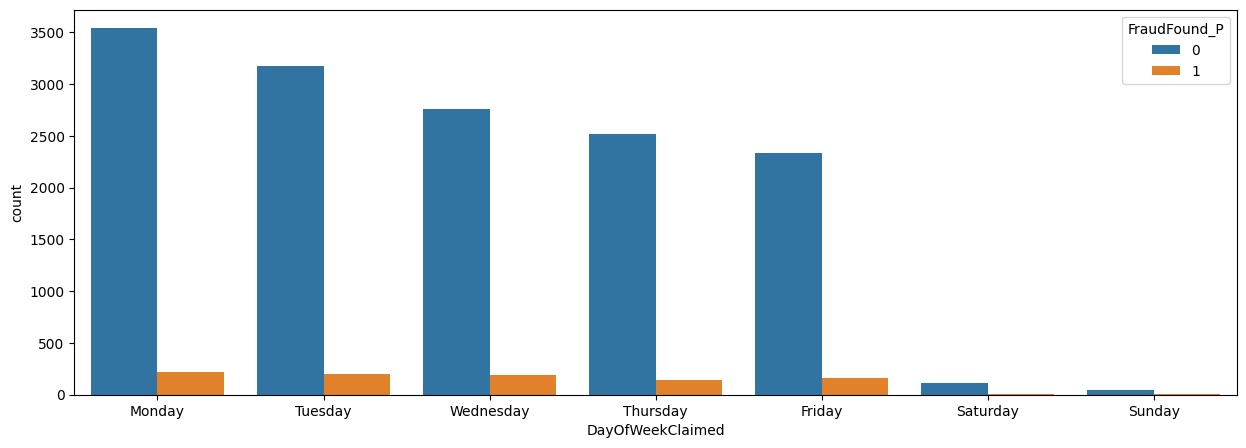

In [429]:
plt.figure(figsize=(15,5))
sns.countplot(x="DayOfWeekClaimed" , hue = 'FraudFound_P', data= data_raw, order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.show()

##### Month Claimed 

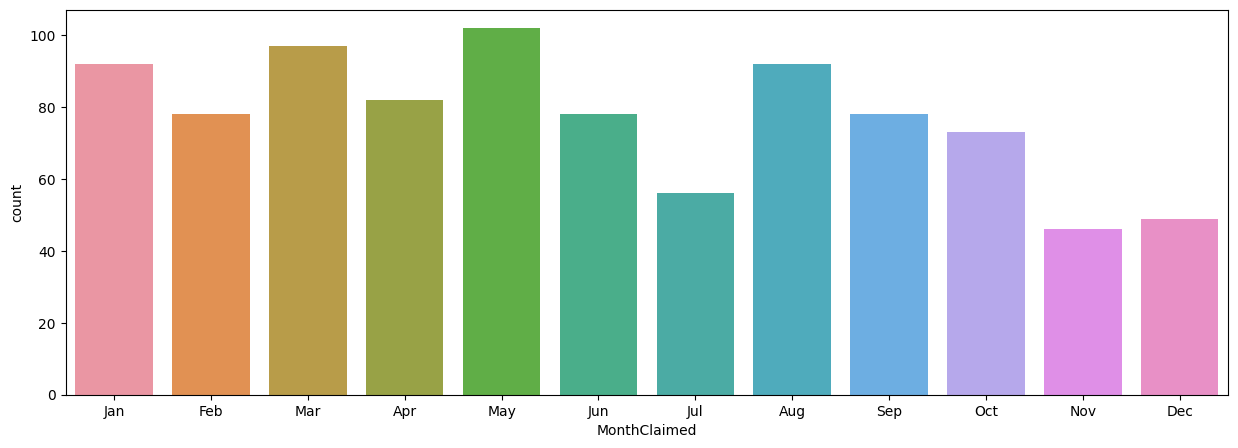

In [430]:
plt.figure(figsize=(15,5))
sns.countplot(data = data_raw[data_raw["FraudFound_P"] == 1], x = "MonthClaimed", order = months)
plt.show()

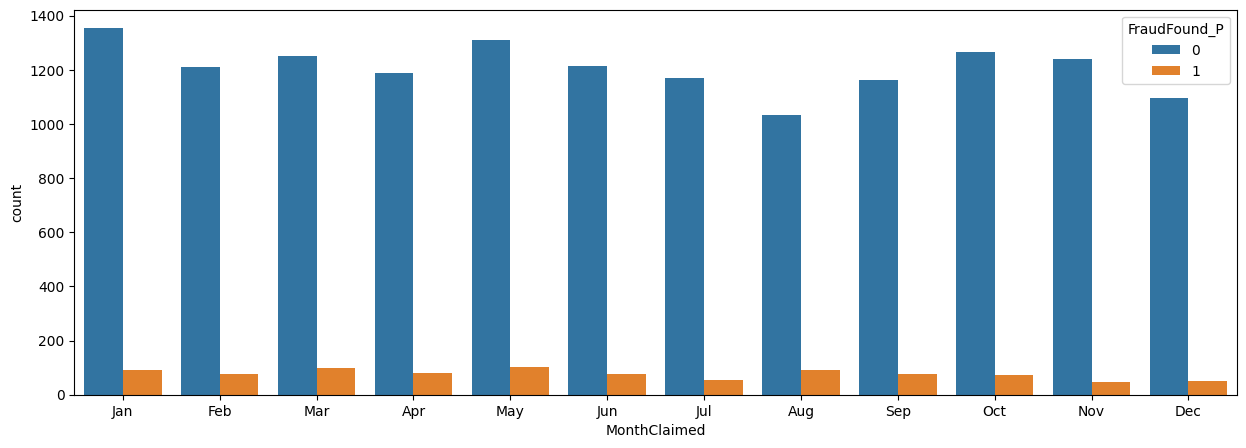

In [431]:
plt.figure(figsize=(15,5))
sns.countplot(x="MonthClaimed" , hue = 'FraudFound_P', data= data_raw, order = months)
plt.show()

We see that may has the most frauds, compared to its total actions. <br>
August also has a high rate of fraud, even though it's total actions is lower than all the other months.

##### Accident Area

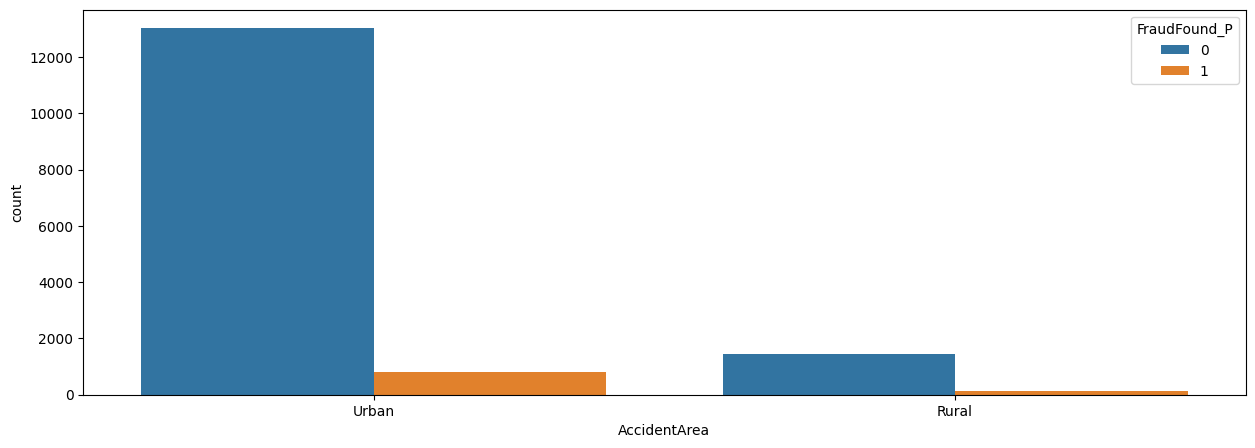

In [432]:
plt.figure(figsize=(15,5))
sns.countplot(x="AccidentArea" , hue = 'FraudFound_P', data= data_raw)
plt.show()

##### Make

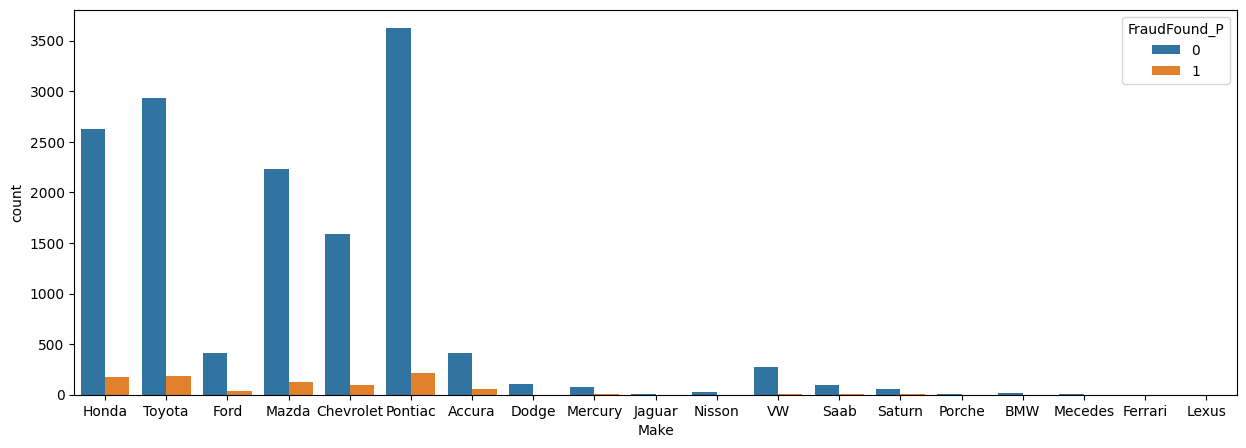

In [433]:
plt.figure(figsize=(15,5))
sns.countplot(x="Make" , hue = 'FraudFound_P', data= data_raw)
plt.show()

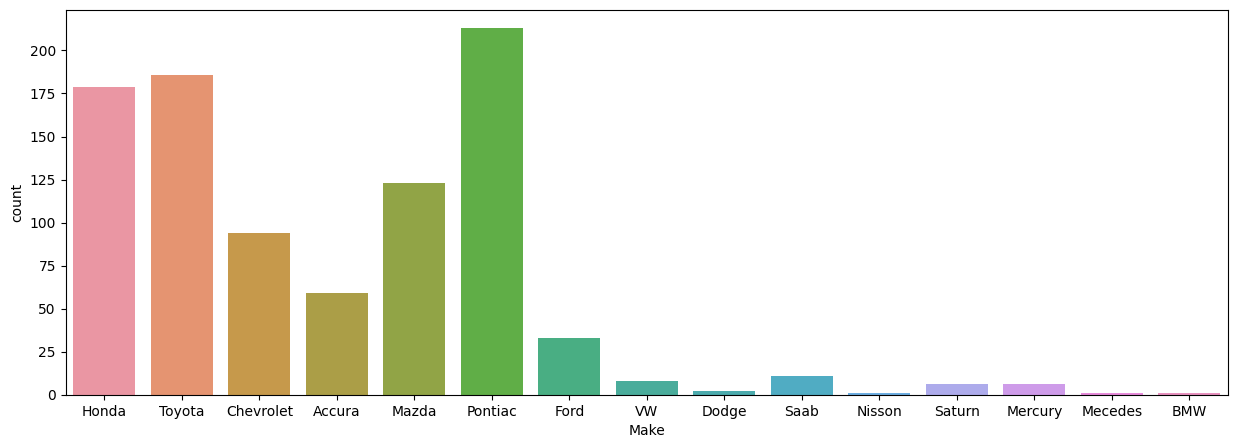

In [434]:
plt.figure(figsize=(15,5))
sns.countplot(data = data_raw[data_raw["FraudFound_P"] == 1], x = "Make")
plt.show()

Pontiac, Toyota, Honda, Mazda and Chevrolet are the cars that are the most frequent in frauds.

##### Week Of Month

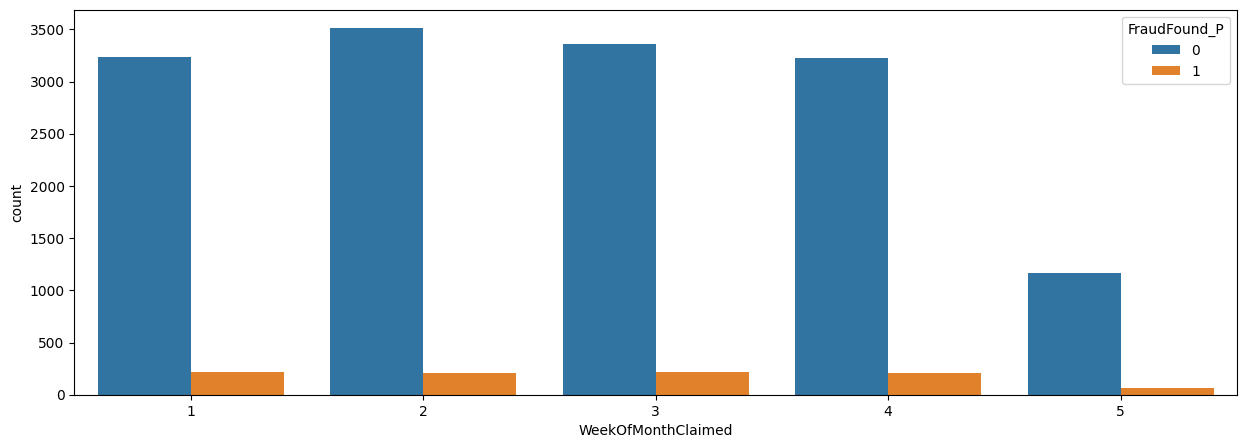

In [435]:
plt.figure(figsize=(15,5))
sns.countplot(x="WeekOfMonthClaimed" , hue = 'FraudFound_P', data= data_raw)
plt.show()

##### Sex

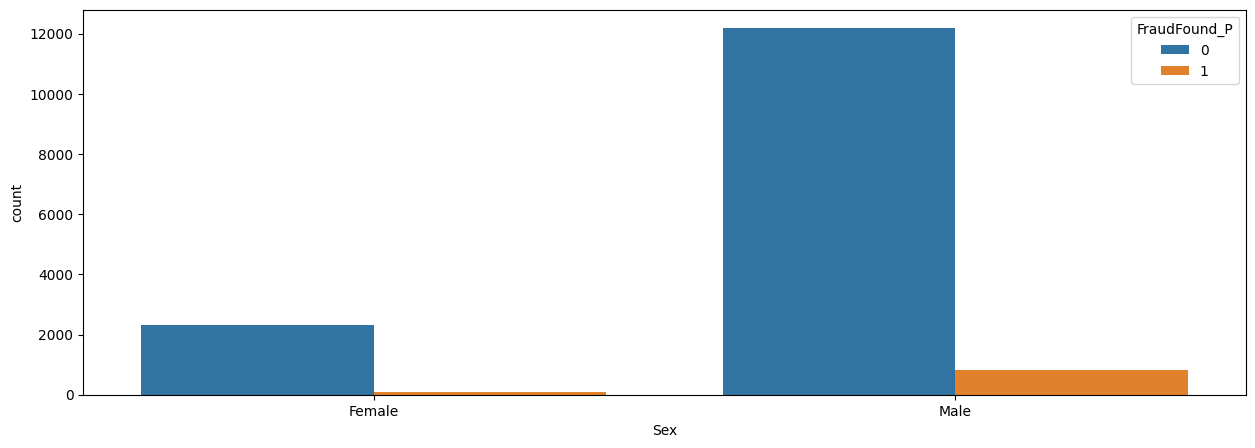

In [436]:
plt.figure(figsize=(15,5))
sns.countplot(x="Sex" , hue = 'FraudFound_P', data= data_raw)
plt.show()

##### Marital Status

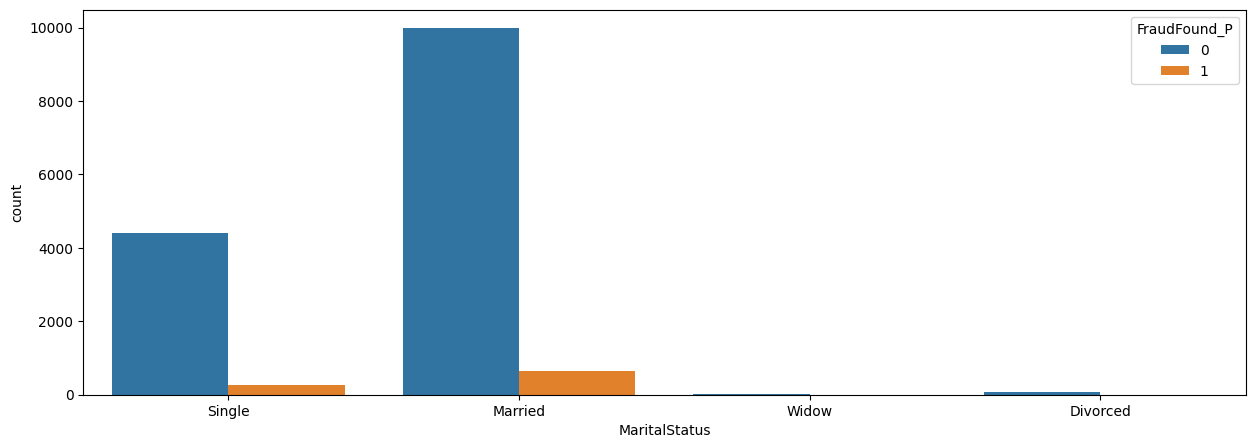

In [437]:
plt.figure(figsize=(15,5))
sns.countplot(x="MaritalStatus" , hue = 'FraudFound_P', data= data_raw)
plt.show()

So most of the people committing frauds are married males.

##### Age Of Vehicle

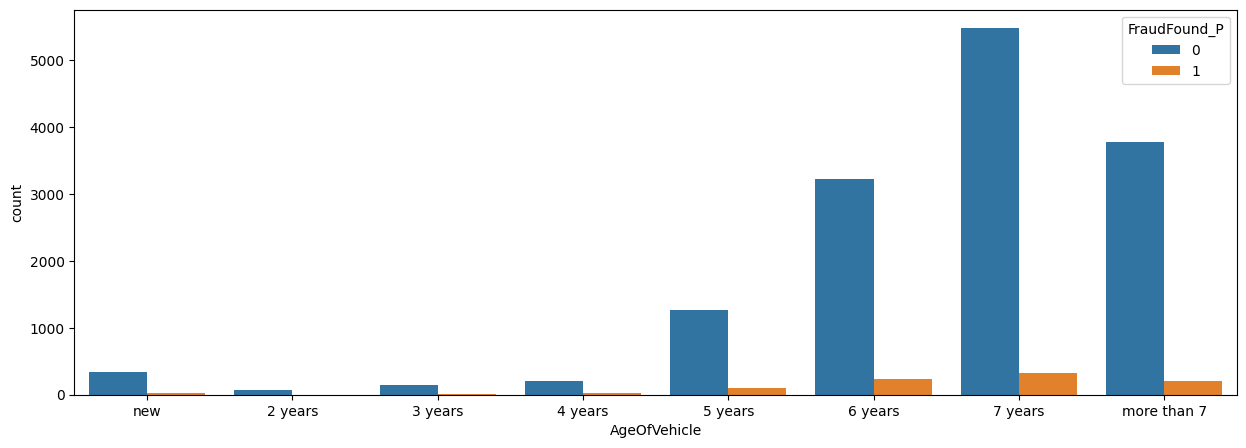

In [438]:
plt.figure(figsize=(15,5))
sns.countplot(x="AgeOfVehicle" , hue = 'FraudFound_P', data= data_raw, order = ageOfVehicle)
plt.show()

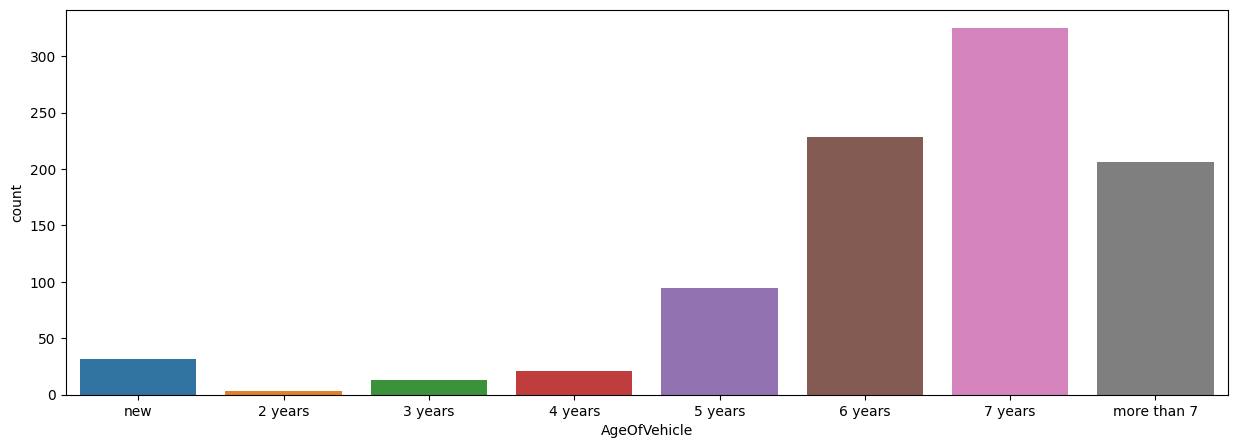

In [439]:
plt.figure(figsize=(15,5))
sns.countplot(data = data_raw[data_raw["FraudFound_P"] == 1], x = "AgeOfVehicle", order = ageOfVehicle)
plt.show()

##### Year

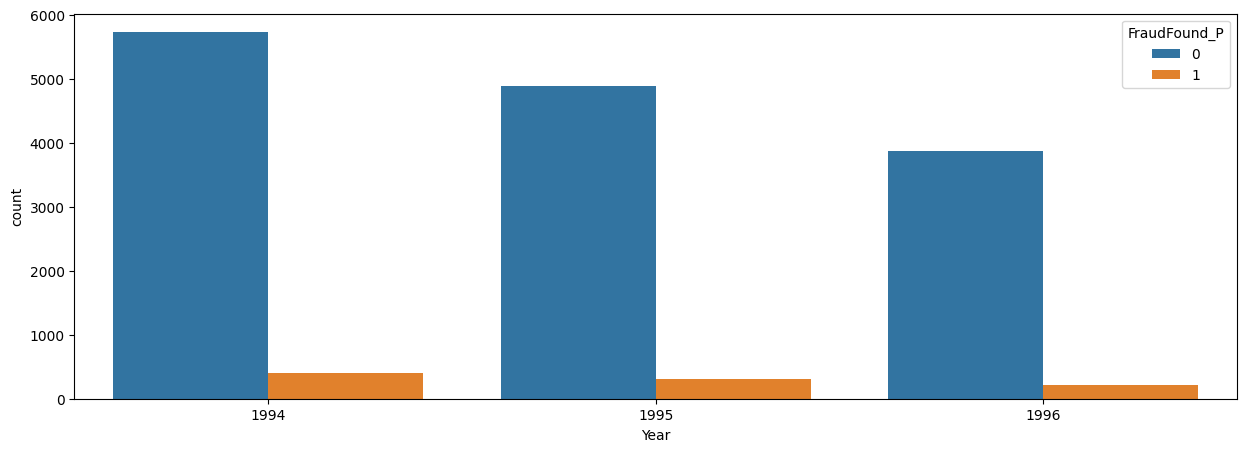

In [440]:
plt.figure(figsize=(15,5))
sns.countplot(x="Year" , hue = 'FraudFound_P', data= data_raw)
plt.show()

##### Age

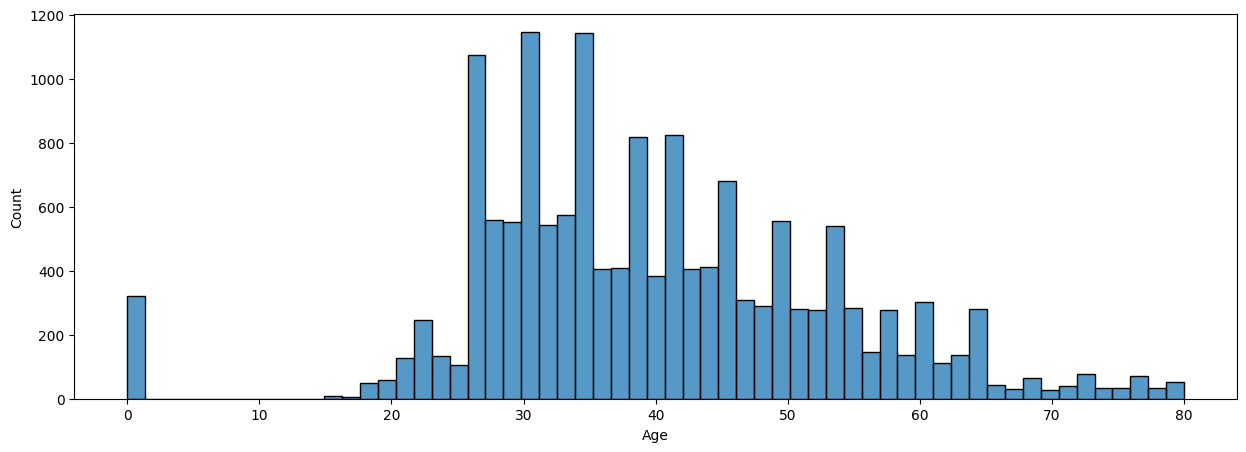

In [441]:
plt.figure(figsize=(15,5))
sns.histplot(x="Age", data= data_raw)
plt.show()

In [442]:
data_raw[data_raw["Age"] == 0].shape[0]

320

We see that we have 320 people with the age 0, which doesn't make sense. <br> That's why later on we're going to remove them or put the mean instead and see the effect.

##### Witness Present

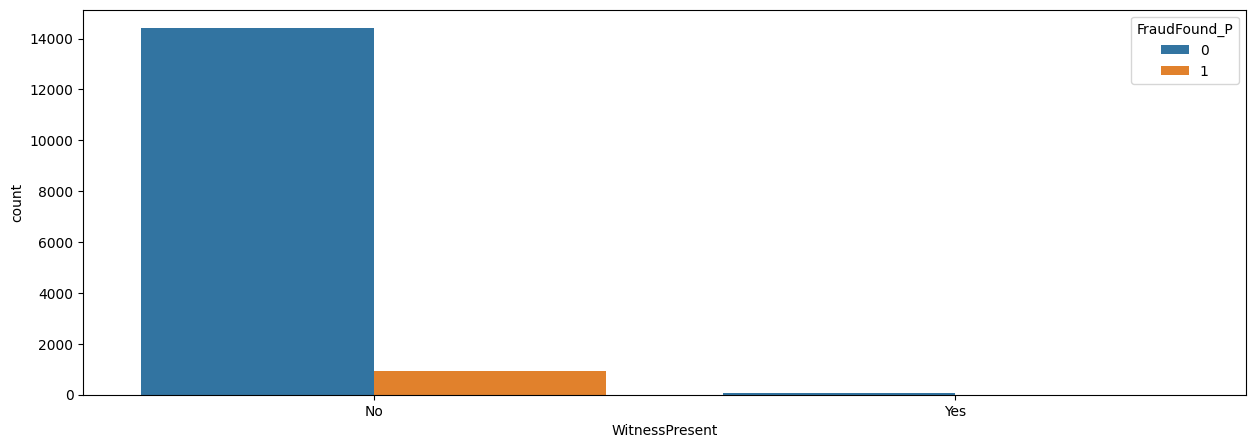

In [443]:
plt.figure(figsize=(15,5))
sns.countplot(x="WitnessPresent" , hue = 'FraudFound_P', data= data_raw)
plt.show()

In most cases, there was no witness present.

### Classification

Classification Report: <br>

1. Precision: Percentage of correct positive predictions relative to total positive predictions. <br>

2. Recall: Percentage of correct positive predictions relative to total actual positives. <br>

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model. <br>

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

#### Preparing data

First we are going to test these methods on our raw data.

In [444]:
X = data.drop(columns = 'FraudFound_P')
Y = data['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
target_names = ['Non-Fraud', 'Fraud']

We have to check for imbalances in our data. <br>
We have 2 types of attributes which we seperated before : numerical & categorical. <br>
The numerical ones need to be scaled for models like logistic regression.

In [462]:
numerical_attributes

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [463]:
numerical_attributes = list(filter(lambda x: x!='FraudFound_P', numerical_attributes))

In [464]:
numerical_attributes

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

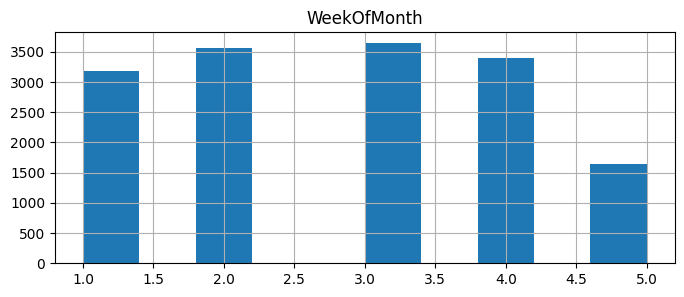

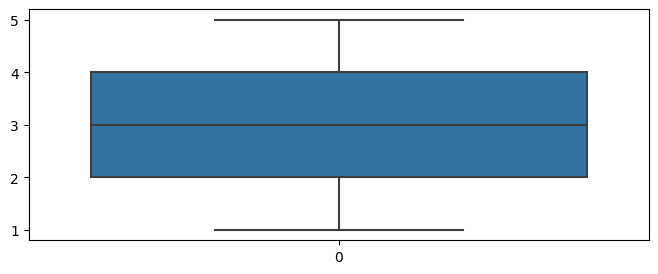

In [465]:
plot_hist_box(data, "WeekOfMonth")

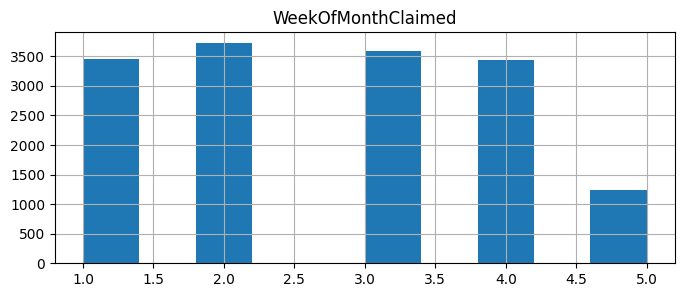

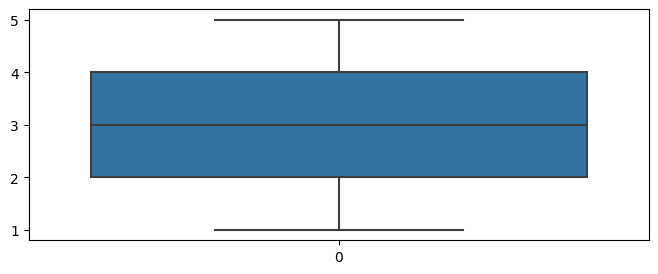

In [466]:
plot_hist_box(data, "WeekOfMonthClaimed")

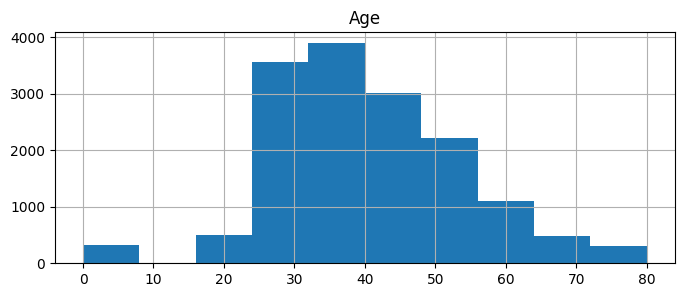

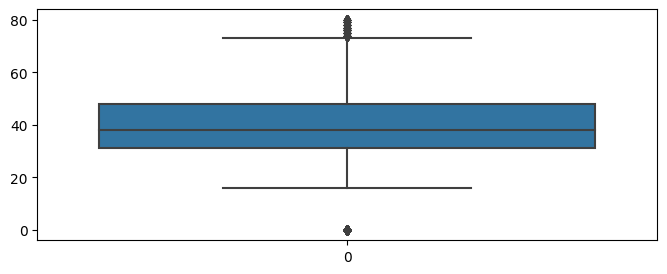

In [467]:
plot_hist_box(data, "Age")

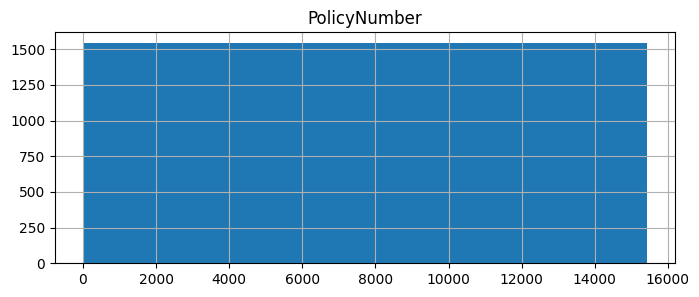

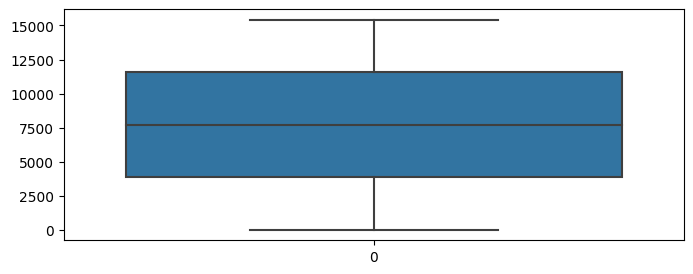

In [468]:
plot_hist_box(data, "PolicyNumber")

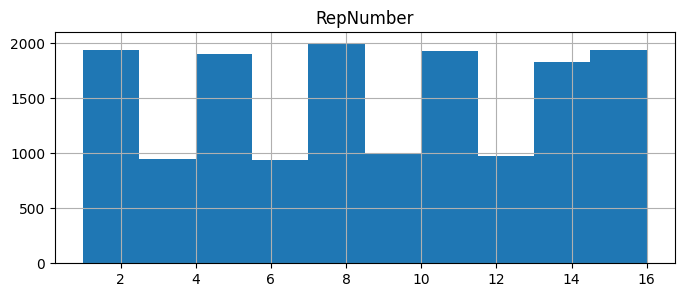

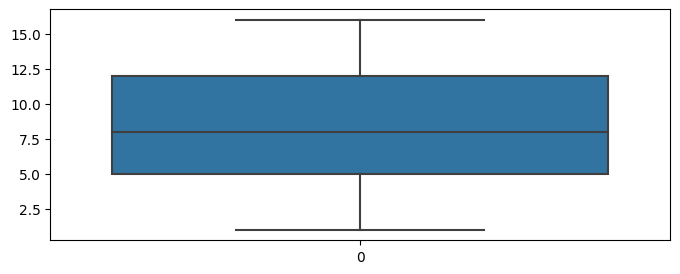

In [469]:
plot_hist_box(data, "RepNumber")

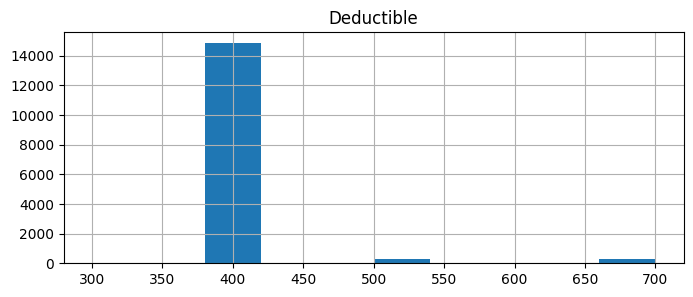

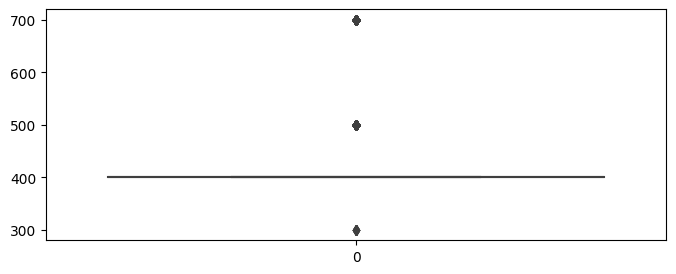

In [470]:
plot_hist_box(data, "Deductible")

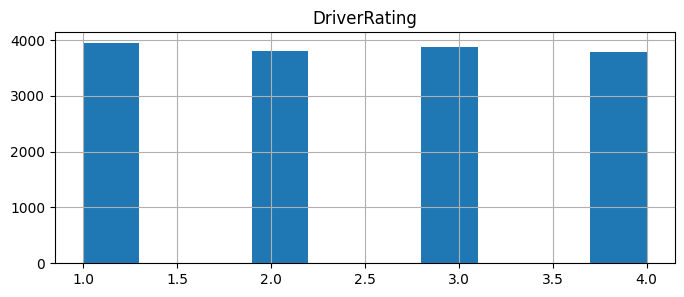

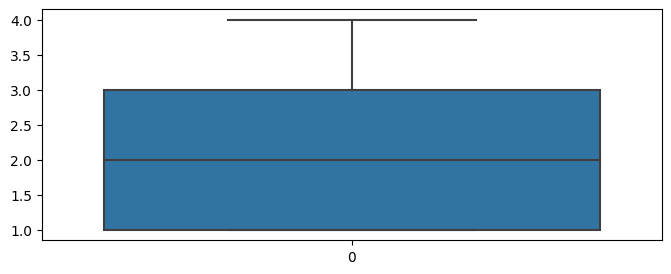

In [471]:
plot_hist_box(data, "DriverRating")

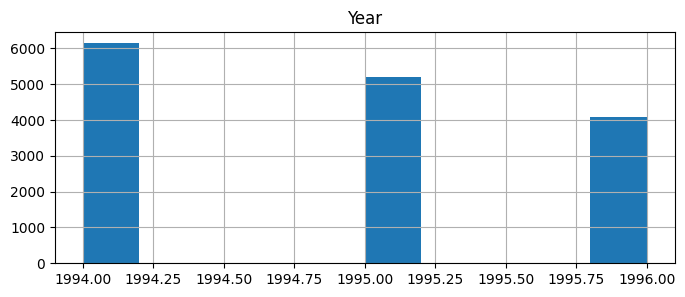

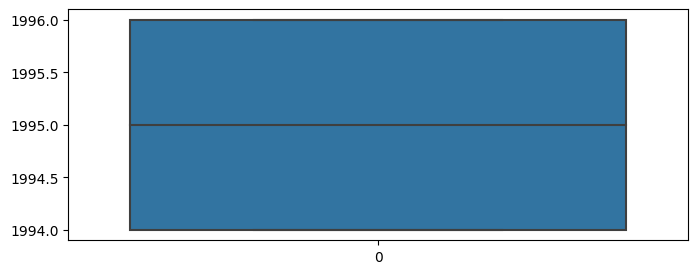

In [472]:
plot_hist_box(data, "Year")

In [473]:
len(data["PolicyNumber"].unique())

15419

We see that the policy numbers are just the number of rows, and probably arent useful, so we drop them.

In [474]:
X2 = X.copy()
X2 = X2.drop(columns="PolicyNumber")

##### Scaling

In [476]:
X_scaled = X.copy()

In [477]:
scaler = StandardScaler().fit(X_scaled[numerical_attributes])
X_scaled[numerical_attributes] = scaler.transform(X_scaled[numerical_attributes])

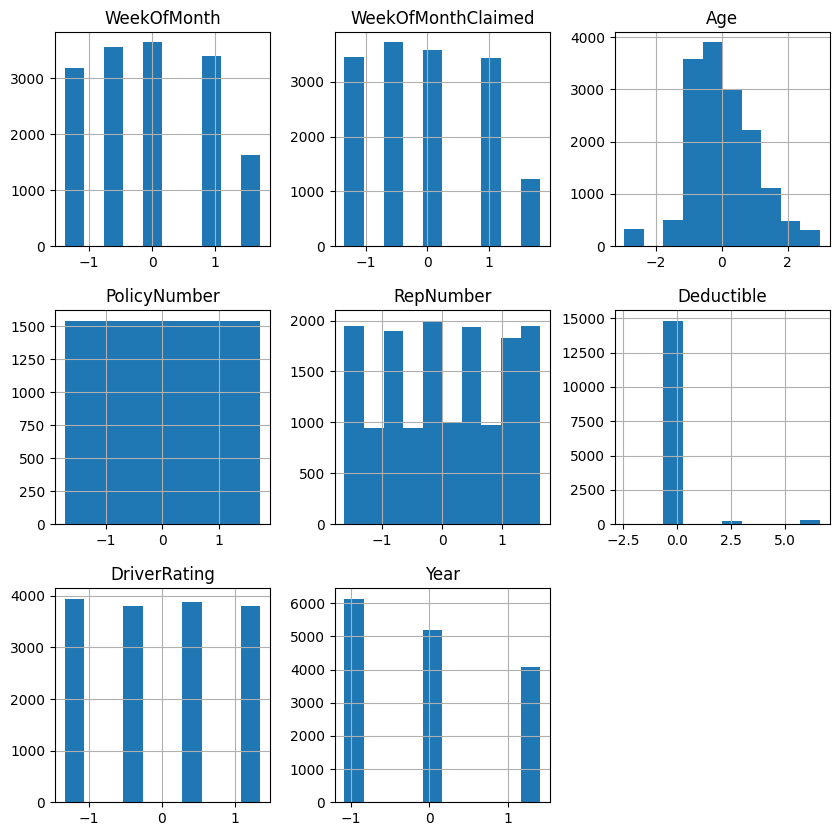

In [523]:
X_scaled[numerical_attributes].hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.3)
plt.show()

#### Functions for plotting

In [445]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    fig, ax = plt.subplots(figsize=(4,4))
    cm_display.plot(ax=ax)
    plt.show()
    
def plot_hist_box(data, feature):
    plt.figure(figsize=(8,3))
    plt.title(feature)
    data[feature].hist()
    plt.show()
    plt.figure(figsize=(8,3))
    sns.boxplot(data[feature])
    plt.show()
    
def plot_hist(data,feature):
    plt.figure(figsize=(8,3))
    sns.histplot(data, x = feature)
    plt.show()
    
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

#### Logistic Regression

In [446]:
def logistic_regression(X_train, X_test, y_train, y_test, class_weight="auto"):
    
    lr_model = LogisticRegression(class_weight=class_weight)
    lr_model.fit(X_train, y_train)
    
    return lr_model

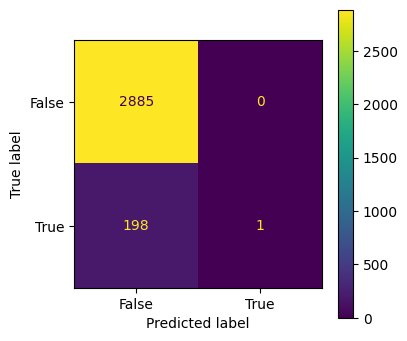

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2885
       Fraud       1.00      0.01      0.01       199

    accuracy                           0.94      3084
   macro avg       0.97      0.50      0.49      3084
weighted avg       0.94      0.94      0.91      3084



In [447]:
lr_model = logistic_regression(X_train, X_test, y_train, y_test)
y_pred = lr_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = target_names))

We see that our error is not converging and it has reached it's iteration limits.

#### SVC

In [459]:
def svc(X_train, X_test, y_train, y_test, class_weight=None):
    
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto',class_weight=class_weight,probability=True))
    clf.fit(X_train, y_train)
    
    return clf

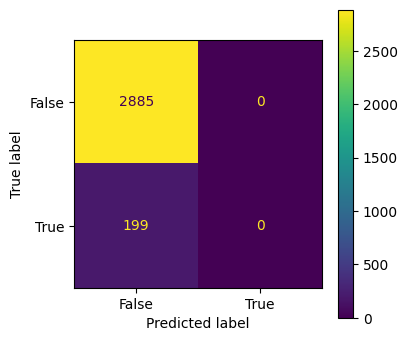

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2885
       Fraud       0.00      0.00      0.00       199

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.90      3084



In [460]:
svc_model = svc(X_train, X_test, y_train, y_test)
y_pred = svc_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = target_names))

#### Decision Tree

In [450]:
def decision_tree(X_train, X_test, y_train, y_test, class_weight=None):
    clf = tree.DecisionTreeClassifier(class_weight=class_weight)
    clf = clf.fit(X_train, y_train)
    
    return clf

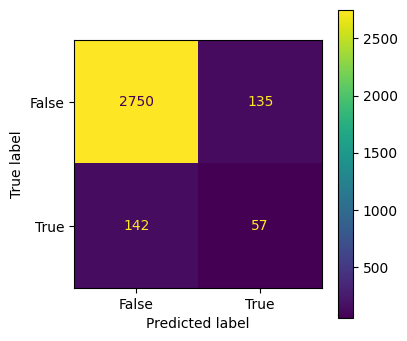

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.95      0.95      2885
       Fraud       0.30      0.29      0.29       199

    accuracy                           0.91      3084
   macro avg       0.62      0.62      0.62      3084
weighted avg       0.91      0.91      0.91      3084



In [451]:
tree_model = decision_tree(X_train, X_test, y_train, y_test)
y_pred = tree_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = target_names))

#### Random Forest

In [452]:
def random_forest(X_train, X_test, y_train, y_test, n_features=4, class_weight=None):

    clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight=class_weight)
    clf.fit(X_train, y_train)
   
    return clf

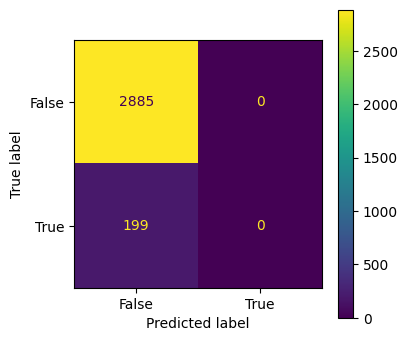

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2885
       Fraud       0.00      0.00      0.00       199

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.90      3084



In [453]:
forest_model = random_forest(X_train, X_test, y_train, y_test, n_features=4)
y_pred = forest_model.predict(X_test)    
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = target_names))

#### KNN 

In [495]:
def knn_func(X_train, X_test, y_train, y_test, n_neighbors=10, class_weight=None):

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    return clf

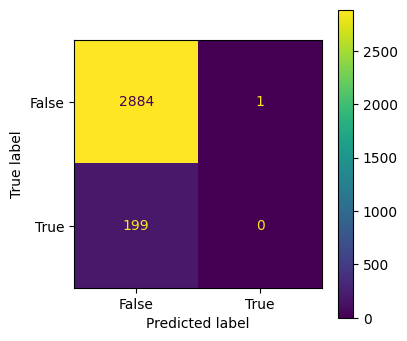

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2885
       Fraud       0.00      0.00      0.00       199

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.90      3084



In [496]:
knn_model = knn_func(X_train, X_test, y_train, y_test, n_neighbors=10)
y_pred = knn_model.predict(X_test)    
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = target_names))

#### Stratified K Fold Cross Validation

 We see that the percentage of the fraud claims is really low, so when splitting the testing and training set, the number of frauds is low and it gets hard for the machine to learn from those few samples. Stratified kfold cross validation is an extension of regular kfold cross validation but specifically for classification problems where rather than the splits being completely random, the ratio between the target classes is the same in each fold as it is in the full dataset.

In [497]:
def stratified_kf(X,y,model="logistic_regression",n_splits=6, technique=None, class_weight=None, n_neighbors=10):
    skf = StratifiedKFold(n_splits=n_splits)
    scores = []
    max_score = -math.inf
    max_score_model = None
    max_score_test_x = None 
    max_score_test_y = None 

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        x_train = X.iloc[train_index]
        y_train = y.iloc[train_index]
        x_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
        
        if technique == "ROS":
            ros = RandomOverSampler(random_state=42)
            x_train, y_train = ros.fit_resample(x_train, y_train)
        elif technique == "RUS":
            rus = RandomUnderSampler(random_state=42)
            x_train, y_train = rus.fit_resample(x_train, y_train)
            
        if model == "svc":
            clf = svc(x_train, x_test, y_train, y_test, class_weight=class_weight)
        elif model == "decision_tree":
            clf = decision_tree(x_train, x_test, y_train, y_test, class_weight=class_weight)
        elif model == "random_forest":
            clf = random_forest(x_train, x_test, y_train, y_test, class_weight=class_weight)
        elif model == "KNN":
            clf = knn_func(x_train, x_test, y_train, y_test, n_neighbors=n_neighbors)
            clf.fit(x_train, y_train)
        elif model == "naive_bayes":
            clf = GaussianNB()
            clf.fit(x_train, y_train)
        else:
            clf = logistic_regression(x_train, x_test, y_train, y_test, class_weight=class_weight)
        
        y_pred = clf.predict(x_test)
        score = f1_score(y_test, y_pred)
        scores.append(score)
        if score > max_score:
            max_score = score
            max_score_model = clf
            max_score_test_x = x_test
            max_score_test_y = y_test
    
    y_score = max_score_model.predict_proba(x_test)[:,1]
    y_pred = max_score_model.predict(max_score_test_x)
    plot_confusion_matrix(max_score_test_y, y_pred)
    plot_roc(y_test, y_score)
    print(classification_report(max_score_test_y, y_pred, target_names = target_names))

In [479]:
param_grid = {'n_neighbors': range(1,50,3)}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, Y)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)
n_neighbors = grid_search.best_params_["n_neighbors"]

Best parameters: {'n_neighbors': 16}
Best F1 score: 0.9401388014184308


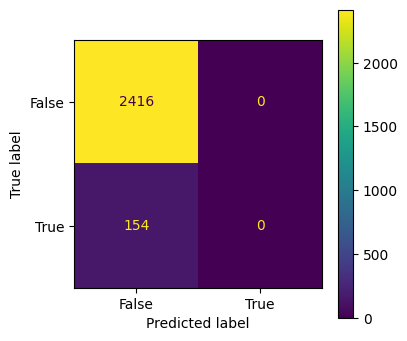

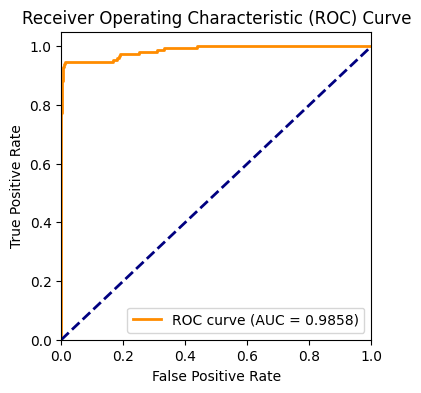

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2416
       Fraud       0.00      0.00      0.00       154

    accuracy                           0.94      2570
   macro avg       0.47      0.50      0.48      2570
weighted avg       0.88      0.94      0.91      2570



In [480]:
stratified_kf(X,Y, model = "svc")

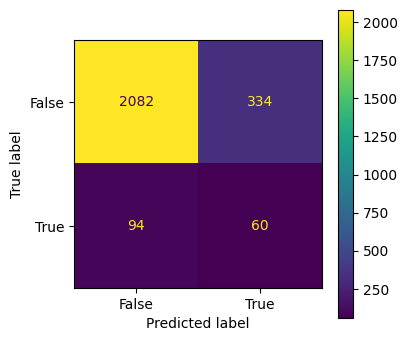

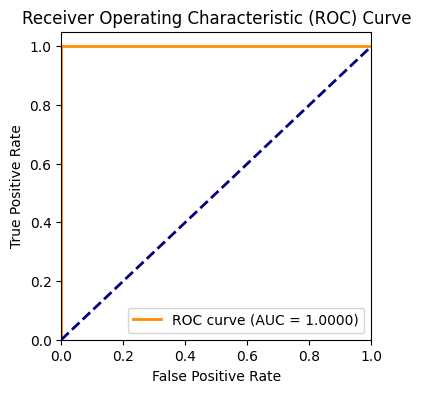

              precision    recall  f1-score   support

   Non-Fraud       0.96      0.86      0.91      2416
       Fraud       0.15      0.39      0.22       154

    accuracy                           0.83      2570
   macro avg       0.55      0.63      0.56      2570
weighted avg       0.91      0.83      0.87      2570



In [481]:
stratified_kf(X,Y, model = "decision_tree")

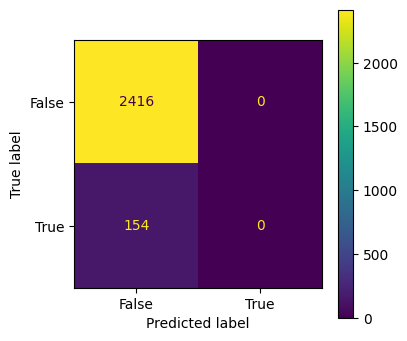

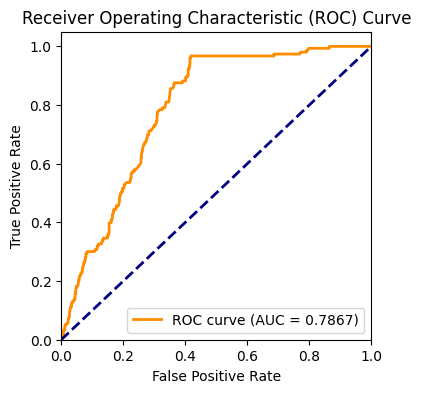

              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2416
       Fraud       0.00      0.00      0.00       154

    accuracy                           0.94      2570
   macro avg       0.47      0.50      0.48      2570
weighted avg       0.88      0.94      0.91      2570



In [482]:
stratified_kf(X,Y, model = "random_forest")

We see that only our decision tree is giving us appropriate scores.

#### Random Oversampling

In [483]:
print(sorted(Counter(Y).items()))

[(0, 14496), (1, 923)]


We have 14496 non-fraudulant and 923 fraudulant datas, which we are going to increase using the Random Oversampler.

In [484]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros= ros.fit_resample(X, Y)
print(sorted(Counter(y_ros).items()))

[(0, 14496), (1, 14496)]


I did this to show the effect of a Random Oversampler, which increased the number of positives to reach the same amount of the negative data.

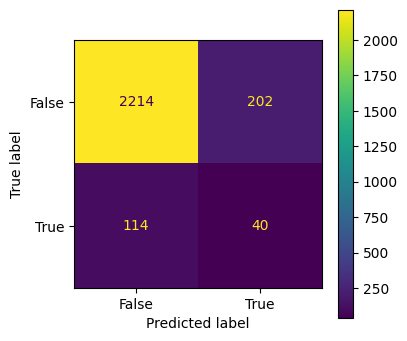

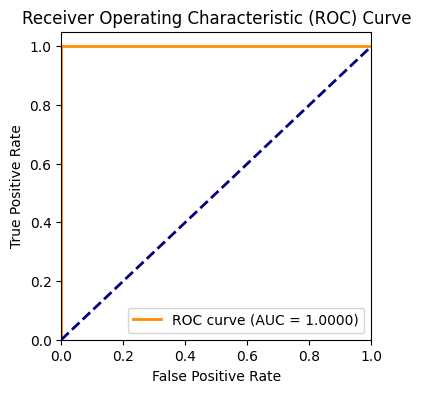

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.92      0.93      2416
       Fraud       0.17      0.26      0.20       154

    accuracy                           0.88      2570
   macro avg       0.56      0.59      0.57      2570
weighted avg       0.90      0.88      0.89      2570



In [485]:
stratified_kf(X,Y, model = "decision_tree", technique="ROS")

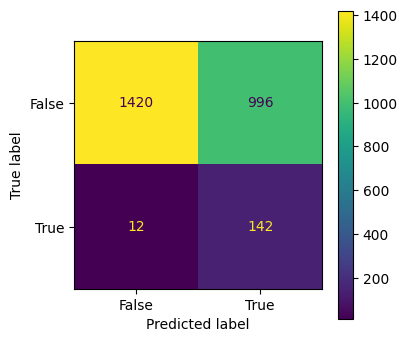

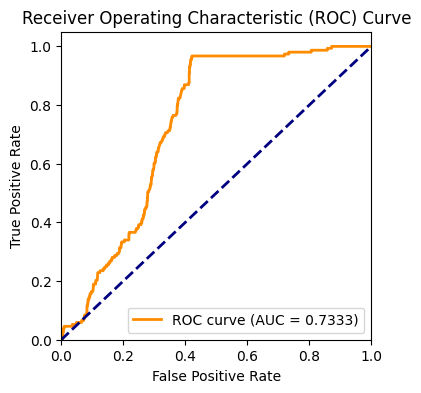

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.59      0.74      2416
       Fraud       0.12      0.92      0.22       154

    accuracy                           0.61      2570
   macro avg       0.56      0.75      0.48      2570
weighted avg       0.94      0.61      0.71      2570



In [486]:
stratified_kf(X,Y, model = "random_forest", technique="ROS")

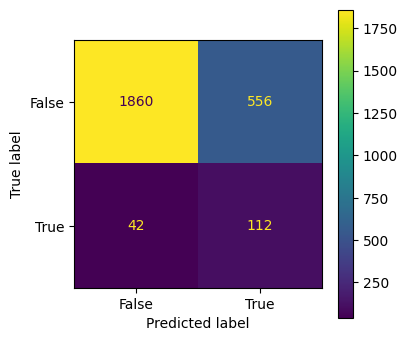

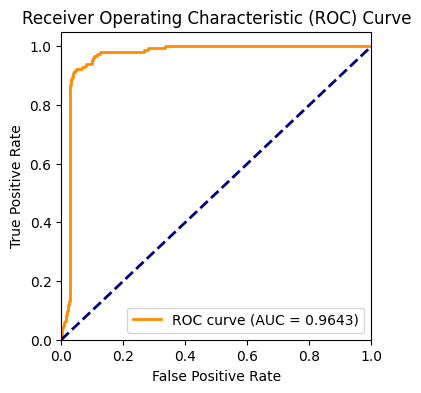

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.77      0.86      2416
       Fraud       0.17      0.73      0.27       154

    accuracy                           0.77      2570
   macro avg       0.57      0.75      0.57      2570
weighted avg       0.93      0.77      0.83      2570



In [488]:
stratified_kf(X,Y, model = "svc", technique="ROS")

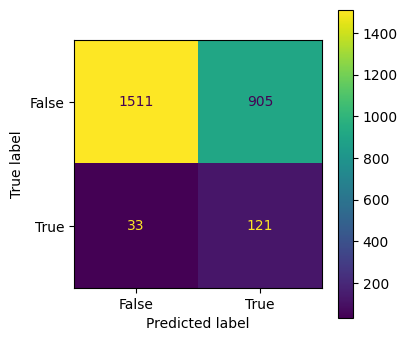

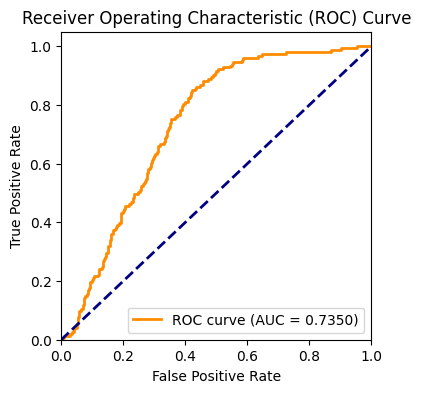

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.63      0.76      2416
       Fraud       0.12      0.79      0.21       154

    accuracy                           0.64      2570
   macro avg       0.55      0.71      0.48      2570
weighted avg       0.93      0.64      0.73      2570



In [524]:
stratified_kf(X,Y, model = "logistic_regression", technique="ROS")

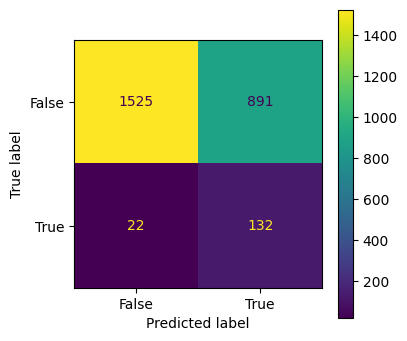

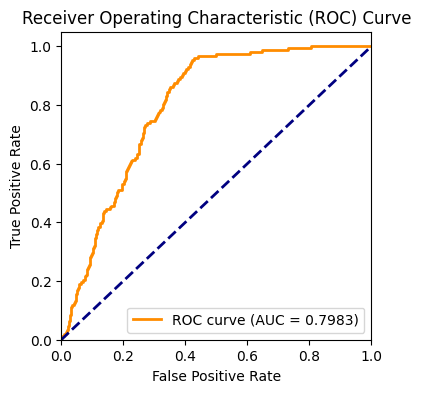

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.63      0.77      2416
       Fraud       0.13      0.86      0.22       154

    accuracy                           0.64      2570
   macro avg       0.56      0.74      0.50      2570
weighted avg       0.93      0.64      0.74      2570



In [489]:
stratified_kf(X_scaled,Y, model = "logistic_regression", technique="ROS")

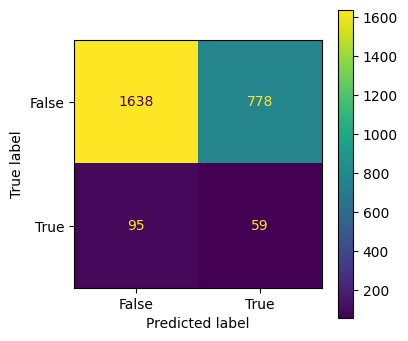

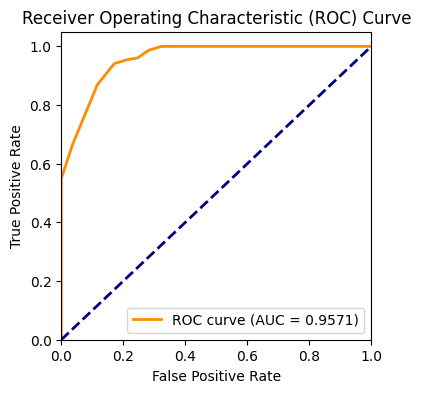

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.68      0.79      2416
       Fraud       0.07      0.38      0.12       154

    accuracy                           0.66      2570
   macro avg       0.51      0.53      0.45      2570
weighted avg       0.89      0.66      0.75      2570



In [498]:
stratified_kf(X_scaled,Y, model = "KNN", technique="ROS", n_neighbors=n_neighbors)

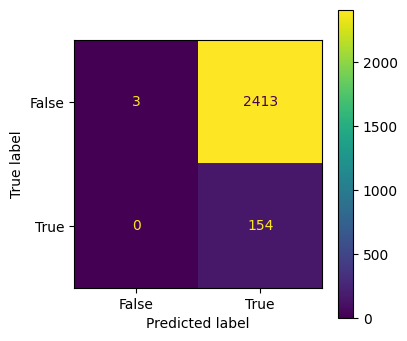

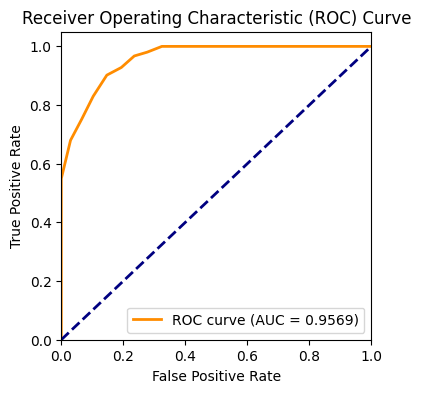

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.00      0.00      2416
       Fraud       0.06      1.00      0.11       154

    accuracy                           0.06      2570
   macro avg       0.53      0.50      0.06      2570
weighted avg       0.94      0.06      0.01      2570



In [499]:
stratified_kf(X,Y, model = "KNN", technique="ROS", n_neighbors=n_neighbors)

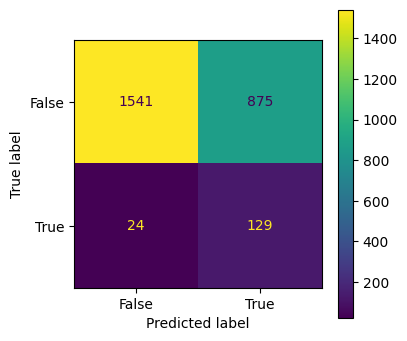

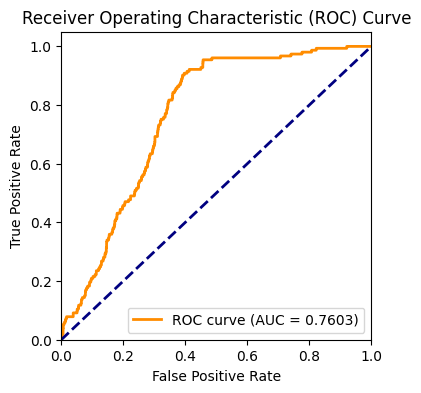

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.64      0.77      2416
       Fraud       0.13      0.84      0.22       153

    accuracy                           0.65      2569
   macro avg       0.56      0.74      0.50      2569
weighted avg       0.93      0.65      0.74      2569



In [500]:
stratified_kf(X,Y, model = "naive_bayes", technique="ROS")

#### Random Undersampling 

In [501]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus= rus.fit_resample(X, Y)
print(sorted(Counter(y_rus).items()))

[(0, 923), (1, 923)]


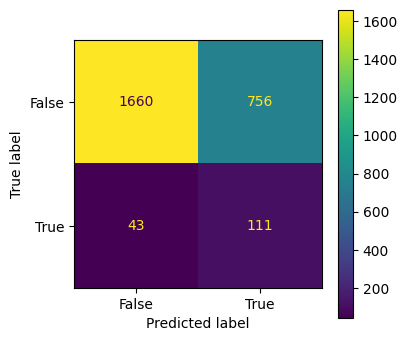

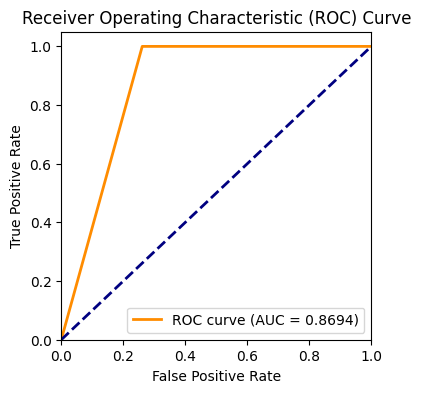

              precision    recall  f1-score   support

   Non-Fraud       0.97      0.69      0.81      2416
       Fraud       0.13      0.72      0.22       154

    accuracy                           0.69      2570
   macro avg       0.55      0.70      0.51      2570
weighted avg       0.92      0.69      0.77      2570



In [502]:
stratified_kf(X,Y, model = "decision_tree", technique="RUS")

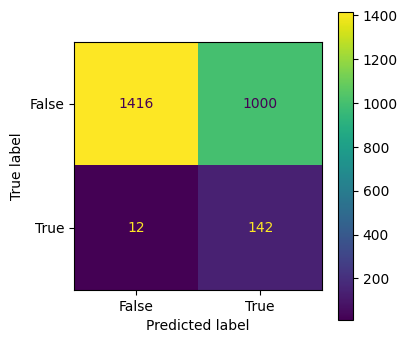

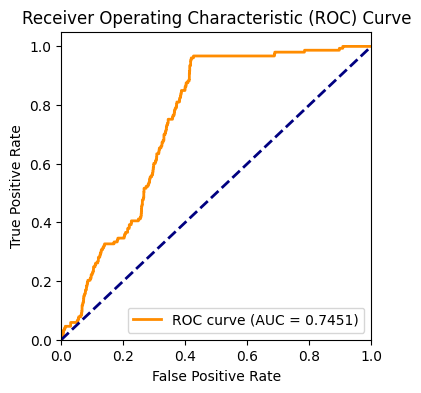

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.59      0.74      2416
       Fraud       0.12      0.92      0.22       154

    accuracy                           0.61      2570
   macro avg       0.56      0.75      0.48      2570
weighted avg       0.94      0.61      0.71      2570



In [503]:
stratified_kf(X,Y, model = "random_forest", technique="RUS")

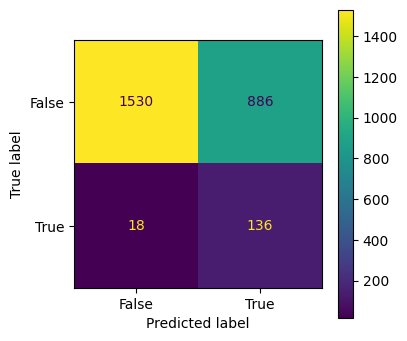

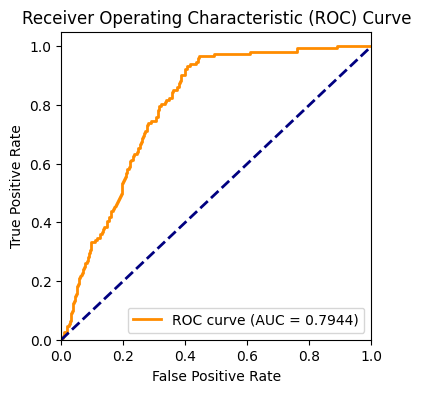

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.63      0.77      2416
       Fraud       0.13      0.88      0.23       154

    accuracy                           0.65      2570
   macro avg       0.56      0.76      0.50      2570
weighted avg       0.94      0.65      0.74      2570



In [504]:
stratified_kf(X_scaled,Y, model = "logistic_regression", technique="RUS")

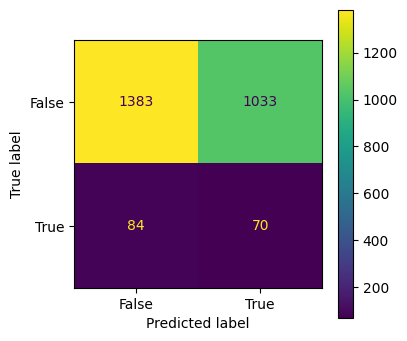

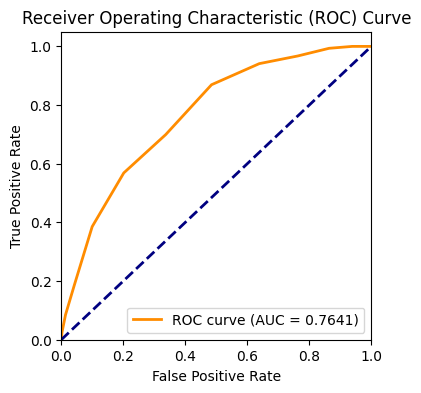

              precision    recall  f1-score   support

   Non-Fraud       0.94      0.57      0.71      2416
       Fraud       0.06      0.45      0.11       154

    accuracy                           0.57      2570
   macro avg       0.50      0.51      0.41      2570
weighted avg       0.89      0.57      0.68      2570



In [505]:
stratified_kf(X_scaled,Y, model = "KNN", technique="RUS", n_neighbors=n_neighbors)

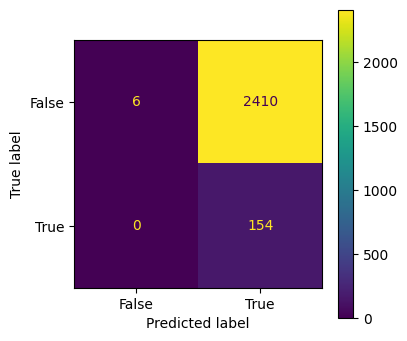

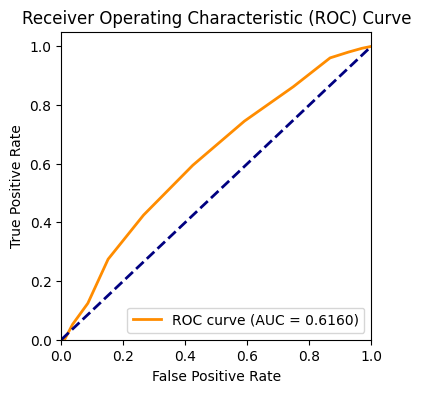

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.00      0.00      2416
       Fraud       0.06      1.00      0.11       154

    accuracy                           0.06      2570
   macro avg       0.53      0.50      0.06      2570
weighted avg       0.94      0.06      0.01      2570



In [506]:
stratified_kf(X,Y, model = "KNN", technique="RUS", n_neighbors=n_neighbors)

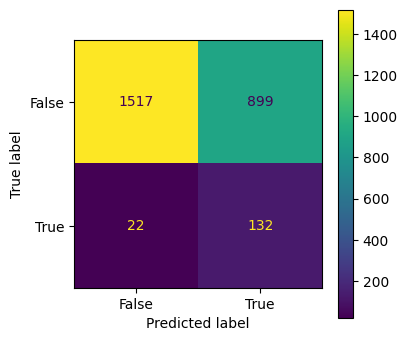

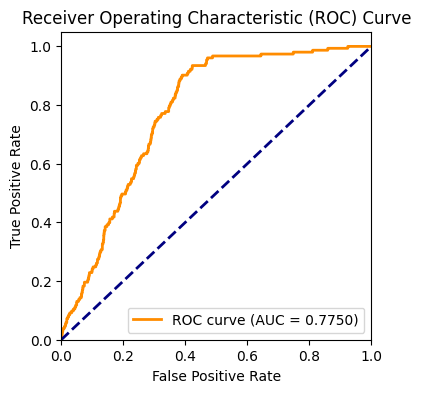

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.63      0.77      2416
       Fraud       0.13      0.86      0.22       154

    accuracy                           0.64      2570
   macro avg       0.56      0.74      0.49      2570
weighted avg       0.93      0.64      0.73      2570



In [507]:
stratified_kf(X,Y, model = "naive_bayes", technique="RUS")

#### Weight-based approaches

In [508]:
print(sorted(Counter(Y).items()))

[(0, 14496), (1, 923)]


In [509]:
14496/923

15.70530877573131

so we give 1 a weight of 15.7.

In [510]:
class_weight={0:1,1:15.7}

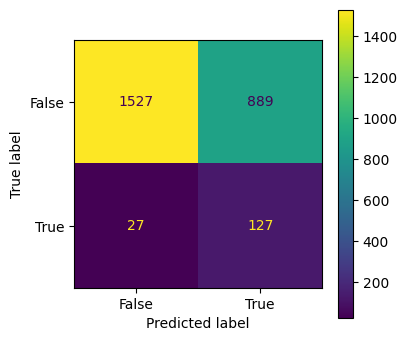

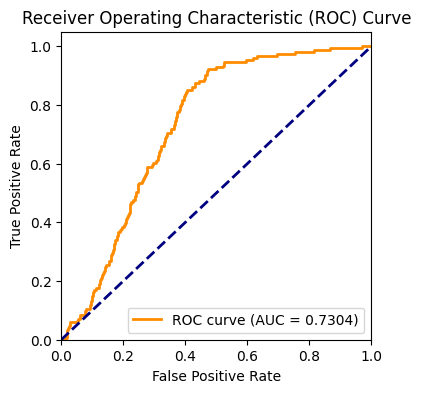

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.63      0.77      2416
       Fraud       0.12      0.82      0.22       154

    accuracy                           0.64      2570
   macro avg       0.55      0.73      0.49      2570
weighted avg       0.93      0.64      0.74      2570



In [511]:
stratified_kf(X,Y, model = "logistic_regression", class_weight=class_weight)

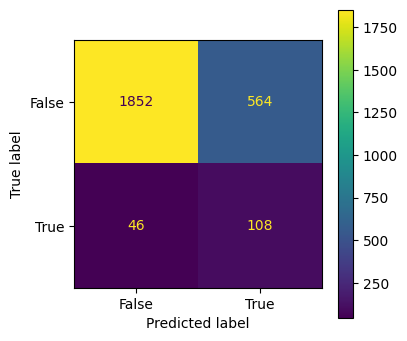

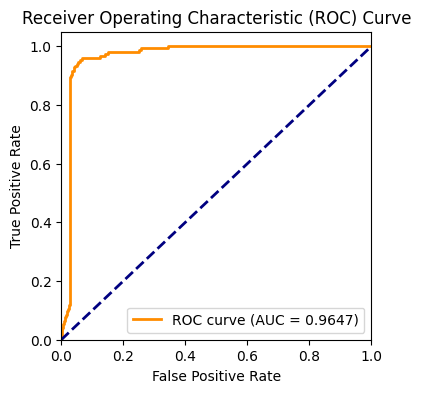

              precision    recall  f1-score   support

   Non-Fraud       0.98      0.77      0.86      2416
       Fraud       0.16      0.70      0.26       154

    accuracy                           0.76      2570
   macro avg       0.57      0.73      0.56      2570
weighted avg       0.93      0.76      0.82      2570



In [512]:
stratified_kf(X,Y, model = "svc", class_weight=class_weight)

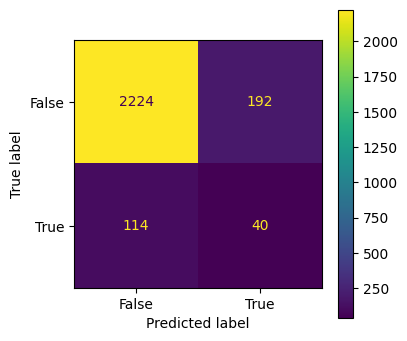

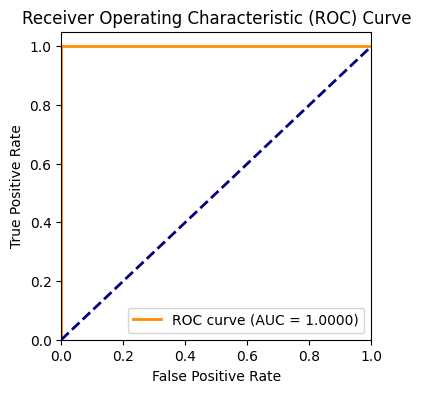

              precision    recall  f1-score   support

   Non-Fraud       0.95      0.92      0.94      2416
       Fraud       0.17      0.26      0.21       154

    accuracy                           0.88      2570
   macro avg       0.56      0.59      0.57      2570
weighted avg       0.90      0.88      0.89      2570



In [513]:
stratified_kf(X,Y, model = "decision_tree", class_weight=class_weight)

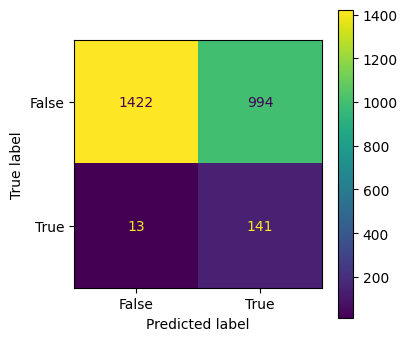

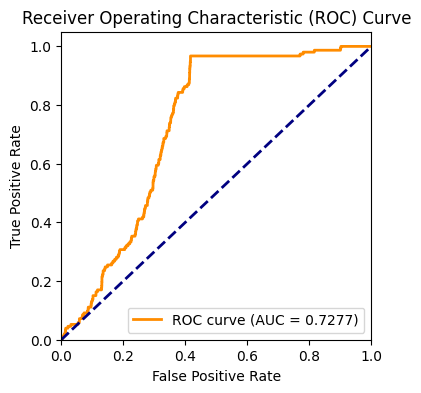

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.59      0.74      2416
       Fraud       0.12      0.92      0.22       154

    accuracy                           0.61      2570
   macro avg       0.56      0.75      0.48      2570
weighted avg       0.94      0.61      0.71      2570



In [514]:
stratified_kf(X,Y, model = "random_forest", class_weight=class_weight)